# Autoencoder trained on the preprocessed dataset.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow 

### Changes: mostly same as the old one, with a diferent batch size for training along with tensorboard summary inclusion

### Start with creating some utility cells

In [1]:
# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# deep learning framework
import tensorflow as tf

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# to plot the images inline
%matplotlib inline

In [2]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [3]:
# check the structure of the project directory
exec_command(['ls', '..'])

LICENSE
Models
network_architecture
processed_words_binary_data
README.md
readme.txt
readme.txt~
Scripts
svc2004
task_log
thresh_wordnet_english_test.py
thresh_wordnet_english_test.py~
words_binary



In [4]:
# ''' Set the constants for the script '''

# various paths of the files
data_path = "../words_binary" # the data path
base_model_path = "../Models"
processed_data_path = "../processed_words_binary_data"
log_dir = os.path.join(base_model_path, "logdir")

# constants for the preprocessing script
data_size = (96, 192, 3)
batch_size = 5000 # 10000 images in each batch
no_of_epochs = 200 # run the training loop for 200 epochs
no_of_batches = 10 # There are 10 batches of data
checkpoint_factor = 2 # save the model after every 2 epochs

In [5]:
# load a batch and check a few images from it
batch_path = os.path.join(processed_data_path, "batch_1")
sanity_test_batch = np.load(batch_path)

In [6]:
sanity_test_batch.shape

(5000, 96, 192, 3)

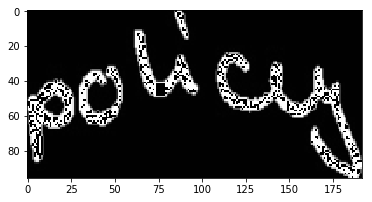

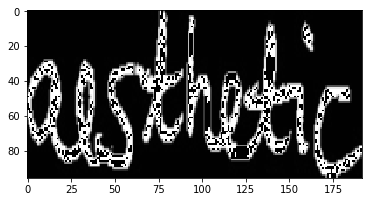

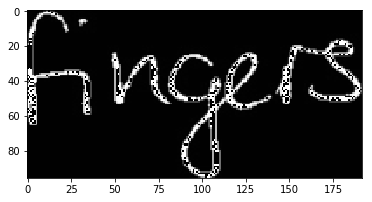

In [7]:
# display a few random images from the dataset:
for _ in range(3):
    random_index = np.random.randint(sanity_test_batch.shape[0])
    plt.figure()
    plt.imshow(sanity_test_batch[random_index])

# In the following cell, I define the computation graph for the network architecture that has been proposed for this task

There is a lot of code written in a single cell, so take a step by step approach towards understanding it

In [8]:
'''
    This cell defines the method required to spawn and return a tensorflow graph for the autoencoder model.
    coded by: Animesh
'''

import tensorflow as tf


myGraph = tf.Graph() #create a new graph object

with myGraph.as_default():
    # define the computations of this graph here:
    
    # helper functions to run the model:
    def normalize(ip_tensor, name = "normalization"):
        '''
            function to normalize the input tensor in the range of [-1, 1] 
            @param
            ip_tensor => the tensor to be normalized
            @return => the normalized version of the tensor
        '''
        with tf.name_scope(name): 
            ip_range = tf.reduce_max(ip_tensor) - tf.reduce_min(ip_tensor)
            mean = tf.reduce_mean(ip_tensor)
            return (ip_tensor - mean) / ip_range
    
    

    # placeholder for the input data batch
    inputs = tf.placeholder(dtype= tf.float32, 
                            shape=(None, data_size[0], data_size[1], data_size[2]), name="inputs")
    
    # normalized inputs to the range of [-1, 1]
    normalized_inputs = normalize(inputs, name="input_normalization")
    
    # create a summary node for some of the inputs
    inputs_summary = tf.summary.image("Input", normalized_inputs[:8])
    # visualize only first 8 images from the batch

    
    # We feed the original inputs to the convNet as shown below:
    # encoder layers: 96 x 192
    conv1_1 = tf.layers.conv2d(inputs, 32, [7, 7], strides=(2, 2), 
                            padding="SAME", name="conv_layer1_1")
    
    bn1_1 = tf.layers.batch_normalization(conv1_1, name="batch_normalization1_1")
    
    relu1_1 = tf.nn.relu(bn1_1, name="relu1_1")
    
    # 48 x 96
    conv1_2 = tf.layers.conv2d(relu1_1, 32, [5, 5], strides=(2, 2),
                            padding="SAME", name="conv_layer1_2")
    
    bn1_2 = tf.layers.batch_normalization(conv1_2, name="batch_normalization1_2")
    
    relu1_2 = tf.nn.relu(bn1_2, name="relu1_2")
    
    # 24 x 48
    conv1_3 = tf.layers.conv2d(relu1_2, 32, [5, 5], strides=(2, 2),
                            padding="SAME", name="conv_layer1_3")
    
    bn1_3 = tf.layers.batch_normalization(conv1_3, name="batch_normalization1_3")
    
    relu1_3 = tf.nn.relu(bn1_3, name="relu1_3")
    
    # 12 x 24
    conv1_4 = tf.layers.conv2d(relu1_3, 16, [3, 3], strides=(2, 2), 
                            padding="SAME", name="conv_layer1_4")

    bn1_4 = tf.layers.batch_normalization(conv1_4, name="batch_normalization1_4")
    
    relu1_4 = tf.nn.relu(bn1_4, name="relu1_4")
    
    # 6 x 12
    
    
    # decoder layers:
    # 6 x 12
    deconv1_1 = tf.layers.conv2d_transpose(relu1_4, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_1")
    
    deBn1_1 = tf.layers.batch_normalization(deconv1_1, name="de_batch_normalization1_1")
    
    deRelu1_1 = tf.nn.relu(deBn1_1, name="de_relu1_1")
    
    # 12 x 24
    deconv1_2 = tf.layers.conv2d_transpose(deRelu1_1, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_2")
    
    deBn1_2 = tf.layers.batch_normalization(deconv1_2, name="de_batch_normalization1_2")
    
    deRelu1_2 = tf.nn.relu(deBn1_2, name="de_relu1_2")
    
    # 24 x 48
    deconv1_3 = tf.layers.conv2d_transpose(deRelu1_2, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_3")
    
    deBn1_3 = tf.layers.batch_normalization(deconv1_3, name="de_batch_normalization1_3")
    
    deRelu1_3 = tf.nn.relu(deBn1_3, name="de_relu1_3")
    
    # 48 x 96
    deconv1_4 = tf.layers.conv2d_transpose(deRelu1_3, 32, [4, 4], strides=(2, 2),
                                           padding="SAME", name="deconv_layer_4")
    
    deBn1_4 = tf.layers.batch_normalization(deconv1_4, name="de_batch_normalization1_4")
    
    deRelu1_4 = tf.nn.relu(deBn1_4, name="de_relu1_4")

    # 96 x 192
    deconv1_5 = tf.layers.conv2d_transpose(deRelu1_4, 3, [3, 3], strides=(1, 1),
                                           padding="SAME", name="deconv_layer_5")
    
    # normalize the predictions i.e deconv1_5 as mentioned above. and then use it for calculating the loss
    normalized_outputs = normalize(deconv1_5, name="output_normalization")
    
    # summary for the output image.
    output_image_summary = tf.summary.image("Output", normalized_outputs[:8]) # record corresponding outputs 
    # for the images.
    
    output = relu1_4 # get a hook on to the latent representation of the encoder
    
    # also generate the summary of the latent representations.
    output_summary = tf.summary.histogram("Latent_Representation", output)

    y_pred = normalized_outputs # output of the decoder
    y_true = normalized_inputs # input at the beginning

    # define the loss for this model:
    # calculate the loss and optimize the network
    loss = tf.norm(y_pred - y_true, ord="euclidean", name="eucledian_loss") # claculate the euclidean loss.
    
    # add a summary op for loss.
    loss_summary = tf.summary.scalar("Loss", loss)

    # using Adam optimizer for optimization
    train_op = tf.train.AdamOptimizer(learning_rate=0.0001, beta1=0.9, beta2=0.999).minimize(loss, name="train_op")
    
    # single op to generate all the summary data
    all_summaries = tf.summary.merge_all()

In [9]:
itera = 1
model_name = "Model2"

In [10]:
# generate a graph of the above model and visualize it.
log_path = os.path.join(log_dir, model_name)
tensorboard_writer = tf.summary.FileWriter(log_path, graph=myGraph)

In [ ]:
''' 
    WARNING WARNING WARNING!!! This is the main training cell. Since, the data used for this task is CIFAR-10, 
    This cell will take a really really long time on low-end machines. It will however not crash your pc, since 
    I have bootstrapped the training in such a way that it loads a small chunk of data at a time to train.
'''

with tf.Session(graph=myGraph) as sess:
    
    # the path where the model will be saved 
    ''' Currently using the Model no. 1 '''
    model_path = os.path.join(base_model_path, model_name)
    
    # The saver object for saving and loading the model
    saver = tf.train.Saver(max_to_keep=2)
    
    if(os.path.isfile(os.path.join(model_path, "checkpoint"))):
        # load the weights from the model
        # instead of global variable initializer, restore the graph:
        saver.restore(sess, tf.train.latest_checkpoint(model_path))
        
    else:
        
        # initialize all the variables
        sess.run(tf.global_variables_initializer())
    
    for ep in range((itera - 1) * no_of_epochs, itera * no_of_epochs):  # start the loop 
        
        print "epoch: " + str(ep + 1)
        print "================================================================================================="
        print "================================================================================================="
        
        for batch_n in range(no_of_batches):  # batches loop
            # log a comment related to the current batch:
            print "current_batch: " + str(batch_n + 1)
            
            # generate the batch images and labels
            batch_images = np.load(os.path.join(processed_data_path, "batch_" + str(batch_n + 1)))
            
            min_batch_size = 64 # we look at only 64 images in a single batch
            
            for index in range(int(float(len(batch_images)) / min_batch_size + 0.5)):
                start = index * min_batch_size
                end = start + min_batch_size
                _, cost = sess.run([train_op, loss], feed_dict={inputs: batch_images[start: end]})
                print('range:{} loss= {}'.format((start, start + len(batch_images[start:end])), cost))
                    
            print "\n=========================================================================================\n"
        
        if((ep + 1) % checkpoint_factor == 0):
            # run the summary op also
            summary = sess.run(all_summaries, feed_dict={inputs: batch_images[start: end]})

            # add the generated summary to the fileWriter
            tensorboard_writer.add_summary(summary, (ep + 1))
            
            # save the model trained so far:
            saver.save(sess, os.path.join(model_path, model_name), global_step = (ep + 1))
        
    print "================================================================================================="
    print "================================================================================================="

epoch: 1
current_batch: 1
range:(0, 64) loss= 708.858032227
range:(64, 128) loss= 724.278381348
range:(128, 192) loss= 692.608276367
range:(192, 256) loss= 701.543762207
range:(256, 320) loss= 696.014892578
range:(320, 384) loss= 716.050476074
range:(384, 448) loss= 713.512145996
range:(448, 512) loss= 689.601379395
range:(512, 576) loss= 709.839355469
range:(576, 640) loss= 692.937072754
range:(640, 704) loss= 694.341125488
range:(704, 768) loss= 730.942443848
range:(768, 832) loss= 697.153930664
range:(832, 896) loss= 698.43371582
range:(896, 960) loss= 679.258666992
range:(960, 1024) loss= 684.682800293
range:(1024, 1088) loss= 687.881958008
range:(1088, 1152) loss= 708.477294922
range:(1152, 1216) loss= 695.737670898
range:(1216, 1280) loss= 690.360412598
range:(1280, 1344) loss= 686.49810791
range:(1344, 1408) loss= 708.514160156
range:(1408, 1472) loss= 693.059326172
range:(1472, 1536) loss= 691.181518555
range:(1536, 1600) loss= 695.900146484
range:(1600, 1664) loss= 679.1389770

range:(3008, 3072) loss= 519.907409668
range:(3072, 3136) loss= 529.602294922
range:(3136, 3200) loss= 546.421203613
range:(3200, 3264) loss= 518.274230957
range:(3264, 3328) loss= 524.727355957
range:(3328, 3392) loss= 530.315673828
range:(3392, 3456) loss= 525.26184082
range:(3456, 3520) loss= 526.15246582
range:(3520, 3584) loss= 523.649536133
range:(3584, 3648) loss= 525.952148438
range:(3648, 3712) loss= 530.348815918
range:(3712, 3776) loss= 523.592529297
range:(3776, 3840) loss= 513.98223877
range:(3840, 3904) loss= 530.258239746
range:(3904, 3968) loss= 536.246582031
range:(3968, 4032) loss= 529.843078613
range:(4032, 4096) loss= 538.850097656
range:(4096, 4160) loss= 535.376586914
range:(4160, 4224) loss= 522.577148438
range:(4224, 4288) loss= 521.754150391
range:(4288, 4352) loss= 514.614379883
range:(4352, 4416) loss= 514.666625977
range:(4416, 4480) loss= 520.387695312
range:(4480, 4544) loss= 528.092956543
range:(4544, 4608) loss= 514.566833496
range:(4608, 4672) loss= 505

range:(1152, 1216) loss= 455.996673584
range:(1216, 1280) loss= 463.194671631
range:(1280, 1344) loss= 443.628631592
range:(1344, 1408) loss= 454.662139893
range:(1408, 1472) loss= 453.363098145
range:(1472, 1536) loss= 441.01260376
range:(1536, 1600) loss= 452.664093018
range:(1600, 1664) loss= 455.693023682
range:(1664, 1728) loss= 450.780609131
range:(1728, 1792) loss= 450.968414307
range:(1792, 1856) loss= 462.747558594
range:(1856, 1920) loss= 460.280151367
range:(1920, 1984) loss= 462.902404785
range:(1984, 2048) loss= 450.753936768
range:(2048, 2112) loss= 459.86517334
range:(2112, 2176) loss= 456.610595703
range:(2176, 2240) loss= 456.129516602
range:(2240, 2304) loss= 462.125030518
range:(2304, 2368) loss= 463.560852051
range:(2368, 2432) loss= 460.487030029
range:(2432, 2496) loss= 455.274688721
range:(2496, 2560) loss= 448.791503906
range:(2560, 2624) loss= 452.16418457
range:(2624, 2688) loss= 452.152587891
range:(2688, 2752) loss= 448.118225098
range:(2752, 2816) loss= 437

range:(4416, 4480) loss= 427.960906982
range:(4480, 4544) loss= 435.082702637
range:(4544, 4608) loss= 425.424499512
range:(4608, 4672) loss= 424.716918945
range:(4672, 4736) loss= 418.838134766
range:(4736, 4800) loss= 428.611907959
range:(4800, 4864) loss= 413.13873291
range:(4864, 4928) loss= 426.391448975
range:(4928, 4992) loss= 428.822174072


current_batch: 9
range:(0, 64) loss= 424.908782959
range:(64, 128) loss= 421.276977539
range:(128, 192) loss= 421.711700439
range:(192, 256) loss= 418.404052734
range:(256, 320) loss= 418.150390625
range:(320, 384) loss= 419.018463135
range:(384, 448) loss= 425.09161377
range:(448, 512) loss= 415.033630371
range:(512, 576) loss= 424.533721924
range:(576, 640) loss= 418.239562988
range:(640, 704) loss= 417.029632568
range:(704, 768) loss= 427.198455811
range:(768, 832) loss= 415.702423096
range:(832, 896) loss= 422.540374756
range:(896, 960) loss= 421.625244141
range:(960, 1024) loss= 407.665100098
range:(1024, 1088) loss= 412.817016602
rang

range:(3328, 3392) loss= 395.45980835
range:(3392, 3456) loss= 405.826690674
range:(3456, 3520) loss= 408.348236084
range:(3520, 3584) loss= 408.349945068
range:(3584, 3648) loss= 398.744812012
range:(3648, 3712) loss= 400.859222412
range:(3712, 3776) loss= 403.592803955
range:(3776, 3840) loss= 396.675872803
range:(3840, 3904) loss= 405.993347168
range:(3904, 3968) loss= 401.935424805
range:(3968, 4032) loss= 404.696868896
range:(4032, 4096) loss= 408.071716309
range:(4096, 4160) loss= 401.591217041
range:(4160, 4224) loss= 395.862579346
range:(4224, 4288) loss= 398.424621582
range:(4288, 4352) loss= 415.535400391
range:(4352, 4416) loss= 406.139556885
range:(4416, 4480) loss= 398.301361084
range:(4480, 4544) loss= 410.935272217
range:(4544, 4608) loss= 411.651123047
range:(4608, 4672) loss= 413.525695801
range:(4672, 4736) loss= 390.131225586
range:(4736, 4800) loss= 401.677276611
range:(4800, 4864) loss= 400.986083984
range:(4864, 4928) loss= 400.874053955
range:(4928, 4992) loss= 3

range:(1472, 1536) loss= 379.382232666
range:(1536, 1600) loss= 389.151031494
range:(1600, 1664) loss= 385.979431152
range:(1664, 1728) loss= 389.997192383
range:(1728, 1792) loss= 387.908447266
range:(1792, 1856) loss= 385.986206055
range:(1856, 1920) loss= 390.890106201
range:(1920, 1984) loss= 389.787994385
range:(1984, 2048) loss= 390.277313232
range:(2048, 2112) loss= 388.989593506
range:(2112, 2176) loss= 380.109802246
range:(2176, 2240) loss= 381.730010986
range:(2240, 2304) loss= 383.131103516
range:(2304, 2368) loss= 389.277587891
range:(2368, 2432) loss= 374.559082031
range:(2432, 2496) loss= 385.594055176
range:(2496, 2560) loss= 383.462219238
range:(2560, 2624) loss= 378.363250732
range:(2624, 2688) loss= 386.392852783
range:(2688, 2752) loss= 386.85446167
range:(2752, 2816) loss= 386.938354492
range:(2816, 2880) loss= 375.381103516
range:(2880, 2944) loss= 374.383026123
range:(2944, 3008) loss= 381.469085693
range:(3008, 3072) loss= 386.240936279
range:(3072, 3136) loss= 3

range:(4736, 4800) loss= 367.285003662
range:(4800, 4864) loss= 365.534454346
range:(4864, 4928) loss= 364.454559326
range:(4928, 4992) loss= 370.725311279


current_batch: 7
range:(0, 64) loss= 379.223602295
range:(64, 128) loss= 375.635162354
range:(128, 192) loss= 360.840209961
range:(192, 256) loss= 374.344482422
range:(256, 320) loss= 364.459411621
range:(320, 384) loss= 361.098358154
range:(384, 448) loss= 364.539916992
range:(448, 512) loss= 369.648406982
range:(512, 576) loss= 372.347473145
range:(576, 640) loss= 371.169189453
range:(640, 704) loss= 358.848083496
range:(704, 768) loss= 363.811065674
range:(768, 832) loss= 368.494049072
range:(832, 896) loss= 376.856811523
range:(896, 960) loss= 371.600952148
range:(960, 1024) loss= 360.023925781
range:(1024, 1088) loss= 356.668457031
range:(1088, 1152) loss= 364.325317383
range:(1152, 1216) loss= 361.818847656
range:(1216, 1280) loss= 372.016143799
range:(1280, 1344) loss= 368.437164307
range:(1344, 1408) loss= 357.999450684
ra

range:(2880, 2944) loss= 347.928863525
range:(2944, 3008) loss= 353.282043457
range:(3008, 3072) loss= 369.646362305
range:(3072, 3136) loss= 362.677032471
range:(3136, 3200) loss= 354.071075439
range:(3200, 3264) loss= 360.133972168
range:(3264, 3328) loss= 360.235290527
range:(3328, 3392) loss= 356.626342773
range:(3392, 3456) loss= 366.466186523
range:(3456, 3520) loss= 351.550262451
range:(3520, 3584) loss= 357.990447998
range:(3584, 3648) loss= 361.417327881
range:(3648, 3712) loss= 346.577850342
range:(3712, 3776) loss= 352.761566162
range:(3776, 3840) loss= 367.511871338
range:(3840, 3904) loss= 361.559967041
range:(3904, 3968) loss= 357.427032471
range:(3968, 4032) loss= 358.855834961
range:(4032, 4096) loss= 364.707672119
range:(4096, 4160) loss= 355.001525879
range:(4160, 4224) loss= 358.055541992
range:(4224, 4288) loss= 359.201904297
range:(4288, 4352) loss= 357.280609131
range:(4352, 4416) loss= 354.484893799
range:(4416, 4480) loss= 347.917114258
range:(4480, 4544) loss= 

range:(1792, 1856) loss= 339.775970459
range:(1856, 1920) loss= 356.967498779
range:(1920, 1984) loss= 340.418731689
range:(1984, 2048) loss= 347.181396484
range:(2048, 2112) loss= 341.459777832
range:(2112, 2176) loss= 348.366760254
range:(2176, 2240) loss= 346.054443359
range:(2240, 2304) loss= 344.324462891
range:(2304, 2368) loss= 353.173553467
range:(2368, 2432) loss= 344.316497803
range:(2432, 2496) loss= 354.782958984
range:(2496, 2560) loss= 339.481842041
range:(2560, 2624) loss= 353.564575195
range:(2624, 2688) loss= 346.126953125
range:(2688, 2752) loss= 348.00579834
range:(2752, 2816) loss= 338.386657715
range:(2816, 2880) loss= 344.987426758
range:(2880, 2944) loss= 345.674316406
range:(2944, 3008) loss= 347.821655273
range:(3008, 3072) loss= 330.716064453
range:(3072, 3136) loss= 344.470245361
range:(3136, 3200) loss= 343.580322266
range:(3200, 3264) loss= 338.044342041
range:(3264, 3328) loss= 344.701080322
range:(3328, 3392) loss= 332.699432373
range:(3392, 3456) loss= 3

range:(0, 64) loss= 336.933990479
range:(64, 128) loss= 339.083129883
range:(128, 192) loss= 335.61038208
range:(192, 256) loss= 335.744140625
range:(256, 320) loss= 334.452575684
range:(320, 384) loss= 337.751434326
range:(384, 448) loss= 333.826416016
range:(448, 512) loss= 339.822509766
range:(512, 576) loss= 321.06942749
range:(576, 640) loss= 331.544616699
range:(640, 704) loss= 334.408355713
range:(704, 768) loss= 336.227935791
range:(768, 832) loss= 332.135101318
range:(832, 896) loss= 328.393554688
range:(896, 960) loss= 334.860931396
range:(960, 1024) loss= 319.8878479
range:(1024, 1088) loss= 334.336425781
range:(1088, 1152) loss= 334.782165527
range:(1152, 1216) loss= 332.787628174
range:(1216, 1280) loss= 338.200866699
range:(1280, 1344) loss= 337.965667725
range:(1344, 1408) loss= 341.822998047
range:(1408, 1472) loss= 332.896209717
range:(1472, 1536) loss= 335.773040771
range:(1536, 1600) loss= 329.612304688
range:(1600, 1664) loss= 332.793640137
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 328.644622803
range:(3392, 3456) loss= 325.924407959
range:(3456, 3520) loss= 324.847991943
range:(3520, 3584) loss= 331.763977051
range:(3584, 3648) loss= 316.962371826
range:(3648, 3712) loss= 318.393768311
range:(3712, 3776) loss= 336.79296875
range:(3776, 3840) loss= 325.008575439
range:(3840, 3904) loss= 326.647583008
range:(3904, 3968) loss= 316.815795898
range:(3968, 4032) loss= 332.994689941
range:(4032, 4096) loss= 334.81237793
range:(4096, 4160) loss= 319.317993164
range:(4160, 4224) loss= 327.9375
range:(4224, 4288) loss= 322.979827881
range:(4288, 4352) loss= 322.207214355
range:(4352, 4416) loss= 333.285949707
range:(4416, 4480) loss= 317.46395874
range:(4480, 4544) loss= 333.18069458
range:(4544, 4608) loss= 336.310180664
range:(4608, 4672) loss= 318.812652588
range:(4672, 4736) loss= 330.058563232
range:(4736, 4800) loss= 328.985473633
range:(4800, 4864) loss= 327.09173584
range:(4864, 4928) loss= 317.662811279
range:(4928, 4992) loss= 327.366363

range:(1536, 1600) loss= 324.862548828
range:(1600, 1664) loss= 317.052368164
range:(1664, 1728) loss= 316.38482666
range:(1728, 1792) loss= 321.635742188
range:(1792, 1856) loss= 321.012512207
range:(1856, 1920) loss= 315.649505615
range:(1920, 1984) loss= 318.792724609
range:(1984, 2048) loss= 309.82510376
range:(2048, 2112) loss= 318.368255615
range:(2112, 2176) loss= 326.733215332
range:(2176, 2240) loss= 320.677459717
range:(2240, 2304) loss= 320.71270752
range:(2304, 2368) loss= 327.63079834
range:(2368, 2432) loss= 319.308532715
range:(2432, 2496) loss= 325.383239746
range:(2496, 2560) loss= 310.826538086
range:(2560, 2624) loss= 320.674499512
range:(2624, 2688) loss= 329.818237305
range:(2688, 2752) loss= 320.048706055
range:(2752, 2816) loss= 319.18258667
range:(2816, 2880) loss= 313.342926025
range:(2880, 2944) loss= 320.036987305
range:(2944, 3008) loss= 313.543518066
range:(3008, 3072) loss= 326.379058838
range:(3072, 3136) loss= 326.748718262
range:(3136, 3200) loss= 316.7

range:(448, 512) loss= 303.247070312
range:(512, 576) loss= 305.764373779
range:(576, 640) loss= 307.807037354
range:(640, 704) loss= 320.087097168
range:(704, 768) loss= 310.422973633
range:(768, 832) loss= 305.994354248
range:(832, 896) loss= 306.940155029
range:(896, 960) loss= 311.384399414
range:(960, 1024) loss= 314.451538086
range:(1024, 1088) loss= 304.014556885
range:(1088, 1152) loss= 302.916107178
range:(1152, 1216) loss= 305.607666016
range:(1216, 1280) loss= 302.769744873
range:(1280, 1344) loss= 301.862548828
range:(1344, 1408) loss= 306.825134277
range:(1408, 1472) loss= 300.510650635
range:(1472, 1536) loss= 305.68637085
range:(1536, 1600) loss= 314.890716553
range:(1600, 1664) loss= 308.931274414
range:(1664, 1728) loss= 310.497406006
range:(1728, 1792) loss= 313.048431396
range:(1792, 1856) loss= 312.237487793
range:(1856, 1920) loss= 308.84552002
range:(1920, 1984) loss= 301.452056885
range:(1984, 2048) loss= 309.546417236
range:(2048, 2112) loss= 312.782104492
range

range:(3776, 3840) loss= 299.079559326
range:(3840, 3904) loss= 301.849121094
range:(3904, 3968) loss= 301.691833496
range:(3968, 4032) loss= 305.452148438
range:(4032, 4096) loss= 299.241912842
range:(4096, 4160) loss= 297.407043457
range:(4160, 4224) loss= 298.428771973
range:(4224, 4288) loss= 310.043823242
range:(4288, 4352) loss= 308.275634766
range:(4352, 4416) loss= 292.28125
range:(4416, 4480) loss= 298.096405029
range:(4480, 4544) loss= 298.647766113
range:(4544, 4608) loss= 292.582305908
range:(4608, 4672) loss= 299.288269043
range:(4672, 4736) loss= 297.194366455
range:(4736, 4800) loss= 301.328155518
range:(4800, 4864) loss= 301.073608398
range:(4864, 4928) loss= 303.285980225
range:(4928, 4992) loss= 307.330444336


current_batch: 6
range:(0, 64) loss= 309.740325928
range:(64, 128) loss= 304.790802002
range:(128, 192) loss= 306.344512939
range:(192, 256) loss= 298.947235107
range:(256, 320) loss= 297.544189453
range:(320, 384) loss= 294.602081299
range:(384, 448) loss= 286

range:(1984, 2048) loss= 294.072479248
range:(2048, 2112) loss= 289.257080078
range:(2112, 2176) loss= 285.132873535
range:(2176, 2240) loss= 293.906707764
range:(2240, 2304) loss= 302.005645752
range:(2304, 2368) loss= 297.520568848
range:(2368, 2432) loss= 290.823364258
range:(2432, 2496) loss= 283.361175537
range:(2496, 2560) loss= 291.261047363
range:(2560, 2624) loss= 296.913543701
range:(2624, 2688) loss= 302.74307251
range:(2688, 2752) loss= 290.44229126
range:(2752, 2816) loss= 293.363677979
range:(2816, 2880) loss= 290.187591553
range:(2880, 2944) loss= 292.006774902
range:(2944, 3008) loss= 296.119567871
range:(3008, 3072) loss= 300.798980713
range:(3072, 3136) loss= 298.602722168
range:(3136, 3200) loss= 292.483215332
range:(3200, 3264) loss= 298.294525146
range:(3264, 3328) loss= 302.690795898
range:(3328, 3392) loss= 289.668518066
range:(3392, 3456) loss= 300.030090332
range:(3456, 3520) loss= 297.694854736
range:(3520, 3584) loss= 301.026641846
range:(3584, 3648) loss= 29

range:(896, 960) loss= 286.258605957
range:(960, 1024) loss= 277.794799805
range:(1024, 1088) loss= 283.353729248
range:(1088, 1152) loss= 284.571807861
range:(1152, 1216) loss= 298.480499268
range:(1216, 1280) loss= 286.629638672
range:(1280, 1344) loss= 285.801055908
range:(1344, 1408) loss= 297.185302734
range:(1408, 1472) loss= 288.499694824
range:(1472, 1536) loss= 286.519470215
range:(1536, 1600) loss= 283.928161621
range:(1600, 1664) loss= 300.603118896
range:(1664, 1728) loss= 290.523284912
range:(1728, 1792) loss= 277.766265869
range:(1792, 1856) loss= 297.203430176
range:(1856, 1920) loss= 294.329162598
range:(1920, 1984) loss= 284.198455811
range:(1984, 2048) loss= 295.124206543
range:(2048, 2112) loss= 283.240112305
range:(2112, 2176) loss= 293.662384033
range:(2176, 2240) loss= 290.824279785
range:(2240, 2304) loss= 284.136322021
range:(2304, 2368) loss= 292.645782471
range:(2368, 2432) loss= 297.522399902
range:(2432, 2496) loss= 290.189147949
range:(2496, 2560) loss= 280

range:(4160, 4224) loss= 285.069366455
range:(4224, 4288) loss= 276.501739502
range:(4288, 4352) loss= 280.225128174
range:(4352, 4416) loss= 275.848205566
range:(4416, 4480) loss= 281.99206543
range:(4480, 4544) loss= 289.022186279
range:(4544, 4608) loss= 290.571868896
range:(4608, 4672) loss= 276.417663574
range:(4672, 4736) loss= 285.886566162
range:(4736, 4800) loss= 281.45880127
range:(4800, 4864) loss= 281.117706299
range:(4864, 4928) loss= 288.448455811
range:(4928, 4992) loss= 279.274200439


current_batch: 4
range:(0, 64) loss= 284.82635498
range:(64, 128) loss= 285.751983643
range:(128, 192) loss= 288.077789307
range:(192, 256) loss= 277.402160645
range:(256, 320) loss= 279.519897461
range:(320, 384) loss= 281.638183594
range:(384, 448) loss= 289.761260986
range:(448, 512) loss= 293.940460205
range:(512, 576) loss= 289.357330322
range:(576, 640) loss= 282.968048096
range:(640, 704) loss= 287.73828125
range:(704, 768) loss= 282.183258057
range:(768, 832) loss= 278.866363525
r

range:(2304, 2368) loss= 285.923339844
range:(2368, 2432) loss= 291.496765137
range:(2432, 2496) loss= 272.042510986
range:(2496, 2560) loss= 271.679992676
range:(2560, 2624) loss= 278.815368652
range:(2624, 2688) loss= 282.997375488
range:(2688, 2752) loss= 276.821624756
range:(2752, 2816) loss= 266.188049316
range:(2816, 2880) loss= 280.640472412
range:(2880, 2944) loss= 280.140045166
range:(2944, 3008) loss= 271.067169189
range:(3008, 3072) loss= 278.864593506
range:(3072, 3136) loss= 280.982116699
range:(3136, 3200) loss= 279.350372314
range:(3200, 3264) loss= 276.613739014
range:(3264, 3328) loss= 281.700958252
range:(3328, 3392) loss= 273.808837891
range:(3392, 3456) loss= 282.294036865
range:(3456, 3520) loss= 278.944000244
range:(3520, 3584) loss= 281.69430542
range:(3584, 3648) loss= 279.54800415
range:(3648, 3712) loss= 287.119476318
range:(3712, 3776) loss= 277.484710693
range:(3776, 3840) loss= 279.346160889
range:(3840, 3904) loss= 275.014190674
range:(3904, 3968) loss= 28

range:(448, 512) loss= 267.528259277
range:(512, 576) loss= 276.133087158
range:(576, 640) loss= 277.13961792
range:(640, 704) loss= 276.364135742
range:(704, 768) loss= 272.512512207
range:(768, 832) loss= 273.010925293
range:(832, 896) loss= 264.978210449
range:(896, 960) loss= 276.213500977
range:(960, 1024) loss= 262.257293701
range:(1024, 1088) loss= 271.966522217
range:(1088, 1152) loss= 273.904632568
range:(1152, 1216) loss= 276.898620605
range:(1216, 1280) loss= 274.361785889
range:(1280, 1344) loss= 268.866638184
range:(1344, 1408) loss= 266.594116211
range:(1408, 1472) loss= 274.233764648
range:(1472, 1536) loss= 276.354675293
range:(1536, 1600) loss= 275.412506104
range:(1600, 1664) loss= 274.558898926
range:(1664, 1728) loss= 271.735076904
range:(1728, 1792) loss= 280.697021484
range:(1792, 1856) loss= 270.498382568
range:(1856, 1920) loss= 275.700042725
range:(1920, 1984) loss= 277.416442871
range:(1984, 2048) loss= 276.419433594
range:(2048, 2112) loss= 263.534423828
rang

range:(4480, 4544) loss= 268.687957764
range:(4544, 4608) loss= 273.086090088
range:(4608, 4672) loss= 283.398284912
range:(4672, 4736) loss= 264.722991943
range:(4736, 4800) loss= 277.347412109
range:(4800, 4864) loss= 275.750976562
range:(4864, 4928) loss= 271.07522583
range:(4928, 4992) loss= 266.831329346


current_batch: 2
range:(0, 64) loss= 258.0
range:(64, 128) loss= 270.578277588
range:(128, 192) loss= 262.735992432
range:(192, 256) loss= 270.036560059
range:(256, 320) loss= 267.490570068
range:(320, 384) loss= 274.736236572
range:(384, 448) loss= 269.39151001
range:(448, 512) loss= 272.135192871
range:(512, 576) loss= 267.79083252
range:(576, 640) loss= 271.971679688
range:(640, 704) loss= 280.275115967
range:(704, 768) loss= 273.96282959
range:(768, 832) loss= 272.926391602
range:(832, 896) loss= 272.827087402
range:(896, 960) loss= 269.846740723
range:(960, 1024) loss= 264.026489258
range:(1024, 1088) loss= 273.51348877
range:(1088, 1152) loss= 270.099945068
range:(1152, 12

range:(2688, 2752) loss= 268.676727295
range:(2752, 2816) loss= 264.708587646
range:(2816, 2880) loss= 259.505096436
range:(2880, 2944) loss= 257.840820312
range:(2944, 3008) loss= 263.633605957
range:(3008, 3072) loss= 261.966247559
range:(3072, 3136) loss= 263.803192139
range:(3136, 3200) loss= 268.418243408
range:(3200, 3264) loss= 277.188934326
range:(3264, 3328) loss= 265.433258057
range:(3328, 3392) loss= 260.933868408
range:(3392, 3456) loss= 262.092071533
range:(3456, 3520) loss= 265.895690918
range:(3520, 3584) loss= 267.175720215
range:(3584, 3648) loss= 264.444976807
range:(3648, 3712) loss= 266.717254639
range:(3712, 3776) loss= 264.860565186
range:(3776, 3840) loss= 263.843841553
range:(3840, 3904) loss= 255.054626465
range:(3904, 3968) loss= 261.506317139
range:(3968, 4032) loss= 258.174591064
range:(4032, 4096) loss= 265.119049072
range:(4096, 4160) loss= 264.029724121
range:(4160, 4224) loss= 267.446136475
range:(4224, 4288) loss= 269.494293213
range:(4288, 4352) loss= 

range:(832, 896) loss= 270.589111328
range:(896, 960) loss= 256.715332031
range:(960, 1024) loss= 254.591064453
range:(1024, 1088) loss= 250.878952026
range:(1088, 1152) loss= 252.178710938
range:(1152, 1216) loss= 252.881698608
range:(1216, 1280) loss= 258.668792725
range:(1280, 1344) loss= 258.561218262
range:(1344, 1408) loss= 251.187591553
range:(1408, 1472) loss= 258.731323242
range:(1472, 1536) loss= 253.341293335
range:(1536, 1600) loss= 253.106567383
range:(1600, 1664) loss= 262.396087646
range:(1664, 1728) loss= 258.476959229
range:(1728, 1792) loss= 268.305023193
range:(1792, 1856) loss= 258.666687012
range:(1856, 1920) loss= 271.13381958
range:(1920, 1984) loss= 256.985076904
range:(1984, 2048) loss= 255.486923218
range:(2048, 2112) loss= 259.183380127
range:(2112, 2176) loss= 252.441299438
range:(2176, 2240) loss= 263.394805908
range:(2240, 2304) loss= 254.154312134
range:(2304, 2368) loss= 260.664428711
range:(2368, 2432) loss= 257.252868652
range:(2432, 2496) loss= 254.12

range:(4096, 4160) loss= 255.775772095
range:(4160, 4224) loss= 256.78994751
range:(4224, 4288) loss= 260.270294189
range:(4288, 4352) loss= 255.753982544
range:(4352, 4416) loss= 256.341003418
range:(4416, 4480) loss= 253.412841797
range:(4480, 4544) loss= 251.59135437
range:(4544, 4608) loss= 255.158462524
range:(4608, 4672) loss= 252.764007568
range:(4672, 4736) loss= 260.46395874
range:(4736, 4800) loss= 257.8644104
range:(4800, 4864) loss= 258.525817871
range:(4864, 4928) loss= 248.600158691
range:(4928, 4992) loss= 253.103775024


current_batch: 10
range:(0, 64) loss= 244.822158813
range:(64, 128) loss= 254.466674805
range:(128, 192) loss= 249.692108154
range:(192, 256) loss= 250.679046631
range:(256, 320) loss= 257.503295898
range:(320, 384) loss= 260.950042725
range:(384, 448) loss= 265.038482666
range:(448, 512) loss= 251.760528564
range:(512, 576) loss= 256.105194092
range:(576, 640) loss= 247.613372803
range:(640, 704) loss= 261.536682129
range:(704, 768) loss= 257.034606934

range:(3008, 3072) loss= 242.536026001
range:(3072, 3136) loss= 249.985458374
range:(3136, 3200) loss= 254.123336792
range:(3200, 3264) loss= 246.48789978
range:(3264, 3328) loss= 250.696609497
range:(3328, 3392) loss= 244.106155396
range:(3392, 3456) loss= 248.299514771
range:(3456, 3520) loss= 251.80619812
range:(3520, 3584) loss= 252.373733521
range:(3584, 3648) loss= 258.979095459
range:(3648, 3712) loss= 252.968826294
range:(3712, 3776) loss= 257.393737793
range:(3776, 3840) loss= 251.224639893
range:(3840, 3904) loss= 249.048812866
range:(3904, 3968) loss= 252.070770264
range:(3968, 4032) loss= 240.290161133
range:(4032, 4096) loss= 252.055175781
range:(4096, 4160) loss= 253.077667236
range:(4160, 4224) loss= 250.940551758
range:(4224, 4288) loss= 253.913101196
range:(4288, 4352) loss= 262.875213623
range:(4352, 4416) loss= 242.670837402
range:(4416, 4480) loss= 244.680328369
range:(4480, 4544) loss= 258.897003174
range:(4544, 4608) loss= 250.446029663
range:(4608, 4672) loss= 25

range:(1152, 1216) loss= 250.636138916
range:(1216, 1280) loss= 249.293762207
range:(1280, 1344) loss= 254.815368652
range:(1344, 1408) loss= 244.947250366
range:(1408, 1472) loss= 250.750839233
range:(1472, 1536) loss= 254.357269287
range:(1536, 1600) loss= 241.207183838
range:(1600, 1664) loss= 250.776290894
range:(1664, 1728) loss= 248.228042603
range:(1728, 1792) loss= 237.73374939
range:(1792, 1856) loss= 244.910705566
range:(1856, 1920) loss= 247.273880005
range:(1920, 1984) loss= 240.264541626
range:(1984, 2048) loss= 253.425140381
range:(2048, 2112) loss= 253.371856689
range:(2112, 2176) loss= 246.30027771
range:(2176, 2240) loss= 251.686386108
range:(2240, 2304) loss= 256.529815674
range:(2304, 2368) loss= 242.7943573
range:(2368, 2432) loss= 243.869796753
range:(2432, 2496) loss= 256.337158203
range:(2496, 2560) loss= 247.651260376
range:(2560, 2624) loss= 248.067932129
range:(2624, 2688) loss= 248.844619751
range:(2688, 2752) loss= 250.609695435
range:(2752, 2816) loss= 246.

range:(4416, 4480) loss= 235.538345337
range:(4480, 4544) loss= 252.434646606
range:(4544, 4608) loss= 256.04574585
range:(4608, 4672) loss= 235.924255371
range:(4672, 4736) loss= 248.803009033
range:(4736, 4800) loss= 246.792327881
range:(4800, 4864) loss= 246.502212524
range:(4864, 4928) loss= 237.144866943
range:(4928, 4992) loss= 243.233612061


current_batch: 8
range:(0, 64) loss= 239.63381958
range:(64, 128) loss= 240.248153687
range:(128, 192) loss= 242.534622192
range:(192, 256) loss= 238.236328125
range:(256, 320) loss= 233.124816895
range:(320, 384) loss= 240.990386963
range:(384, 448) loss= 247.564849854
range:(448, 512) loss= 248.008972168
range:(512, 576) loss= 241.225463867
range:(576, 640) loss= 235.348800659
range:(640, 704) loss= 258.391540527
range:(704, 768) loss= 244.575714111
range:(768, 832) loss= 247.315414429
range:(832, 896) loss= 248.712158203
range:(896, 960) loss= 245.715576172
range:(960, 1024) loss= 242.561294556
range:(1024, 1088) loss= 241.986495972
rang

range:(2560, 2624) loss= 244.23866272
range:(2624, 2688) loss= 248.105026245
range:(2688, 2752) loss= 239.559875488
range:(2752, 2816) loss= 240.124801636
range:(2816, 2880) loss= 236.059448242
range:(2880, 2944) loss= 238.295669556
range:(2944, 3008) loss= 236.424758911
range:(3008, 3072) loss= 248.292114258
range:(3072, 3136) loss= 240.043319702
range:(3136, 3200) loss= 239.954742432
range:(3200, 3264) loss= 239.067703247
range:(3264, 3328) loss= 238.564147949
range:(3328, 3392) loss= 248.280441284
range:(3392, 3456) loss= 244.218139648
range:(3456, 3520) loss= 240.505615234
range:(3520, 3584) loss= 238.170135498
range:(3584, 3648) loss= 232.706466675
range:(3648, 3712) loss= 232.767715454
range:(3712, 3776) loss= 234.056930542
range:(3776, 3840) loss= 245.622085571
range:(3840, 3904) loss= 235.1144104


epoch: 8
current_batch: 1
range:(0, 64) loss= 243.403396606
range:(64, 128) loss= 239.42527771
range:(128, 192) loss= 238.346679688
range:(192, 256) loss= 232.668518066
range:(256, 3

range:(1472, 1536) loss= 232.025268555
range:(1536, 1600) loss= 241.051422119
range:(1600, 1664) loss= 236.531143188
range:(1664, 1728) loss= 234.54284668
range:(1728, 1792) loss= 243.655441284
range:(1792, 1856) loss= 239.271408081
range:(1856, 1920) loss= 239.676574707
range:(1920, 1984) loss= 233.177337646
range:(1984, 2048) loss= 237.74156189
range:(2048, 2112) loss= 240.151168823
range:(2112, 2176) loss= 238.902252197
range:(2176, 2240) loss= 234.567764282
range:(2240, 2304) loss= 235.101028442
range:(2304, 2368) loss= 239.118164062
range:(2368, 2432) loss= 237.754638672
range:(2432, 2496) loss= 239.491989136
range:(2496, 2560) loss= 233.514221191
range:(2560, 2624) loss= 230.943466187
range:(2624, 2688) loss= 244.584793091
range:(2688, 2752) loss= 234.10067749
range:(2752, 2816) loss= 233.359802246
range:(2816, 2880) loss= 233.492370605
range:(2880, 2944) loss= 245.940963745
range:(2944, 3008) loss= 231.039459229
range:(3008, 3072) loss= 237.513702393
range:(3072, 3136) loss= 232

range:(4736, 4800) loss= 232.147201538
range:(4800, 4864) loss= 230.995269775
range:(4864, 4928) loss= 233.07649231
range:(4928, 4992) loss= 230.447921753


current_batch: 6
range:(0, 64) loss= 237.947860718
range:(64, 128) loss= 234.376846313
range:(128, 192) loss= 236.946655273
range:(192, 256) loss= 226.118789673
range:(256, 320) loss= 232.840362549
range:(320, 384) loss= 226.824356079
range:(384, 448) loss= 222.717178345
range:(448, 512) loss= 235.44770813
range:(512, 576) loss= 234.984924316
range:(576, 640) loss= 237.919418335
range:(640, 704) loss= 235.974243164
range:(704, 768) loss= 231.398223877
range:(768, 832) loss= 230.367889404
range:(832, 896) loss= 236.261734009
range:(896, 960) loss= 234.366607666
range:(960, 1024) loss= 243.022888184
range:(1024, 1088) loss= 224.225204468
range:(1088, 1152) loss= 241.266448975
range:(1152, 1216) loss= 239.079711914
range:(1216, 1280) loss= 232.672714233
range:(1280, 1344) loss= 233.000671387
range:(1344, 1408) loss= 228.412261963
rang

range:(2944, 3008) loss= 230.838180542
range:(3008, 3072) loss= 233.572189331
range:(3072, 3136) loss= 231.689224243
range:(3136, 3200) loss= 228.570861816
range:(3200, 3264) loss= 234.302337646
range:(3264, 3328) loss= 235.855285645
range:(3328, 3392) loss= 226.584991455
range:(3392, 3456) loss= 235.450714111
range:(3456, 3520) loss= 235.008850098
range:(3520, 3584) loss= 234.061141968
range:(3584, 3648) loss= 228.451980591
range:(3648, 3712) loss= 231.928207397
range:(3712, 3776) loss= 232.732391357
range:(3776, 3840) loss= 228.473815918
range:(3840, 3904) loss= 229.098510742
range:(3904, 3968) loss= 224.918807983
range:(3968, 4032) loss= 228.607635498
range:(4032, 4096) loss= 234.408462524
range:(4096, 4160) loss= 230.457519531
range:(4160, 4224) loss= 234.542953491
range:(4224, 4288) loss= 229.278625488
range:(4288, 4352) loss= 237.435134888
range:(4352, 4416) loss= 234.302978516
range:(4416, 4480) loss= 235.839859009
range:(4480, 4544) loss= 230.166915894
range:(4544, 4608) loss= 

range:(1856, 1920) loss= 233.013473511
range:(1920, 1984) loss= 225.062515259
range:(1984, 2048) loss= 230.258743286
range:(2048, 2112) loss= 221.925765991
range:(2112, 2176) loss= 230.546005249
range:(2176, 2240) loss= 228.704284668
range:(2240, 2304) loss= 223.586044312
range:(2304, 2368) loss= 224.208343506
range:(2368, 2432) loss= 232.713470459
range:(2432, 2496) loss= 224.285736084
range:(2496, 2560) loss= 219.003662109
range:(2560, 2624) loss= 221.440597534
range:(2624, 2688) loss= 220.904632568
range:(2688, 2752) loss= 221.343963623
range:(2752, 2816) loss= 226.810302734
range:(2816, 2880) loss= 226.856750488
range:(2880, 2944) loss= 227.251663208
range:(2944, 3008) loss= 224.087966919
range:(3008, 3072) loss= 238.20123291
range:(3072, 3136) loss= 235.334609985
range:(3136, 3200) loss= 231.057052612
range:(3200, 3264) loss= 229.923278809
range:(3264, 3328) loss= 230.114501953
range:(3328, 3392) loss= 220.153594971
range:(3392, 3456) loss= 235.352401733
range:(3456, 3520) loss= 2

range:(0, 64) loss= 227.465438843
range:(64, 128) loss= 221.949569702
range:(128, 192) loss= 226.028045654
range:(192, 256) loss= 220.614425659
range:(256, 320) loss= 219.921234131
range:(320, 384) loss= 222.54296875
range:(384, 448) loss= 230.935348511
range:(448, 512) loss= 234.356567383
range:(512, 576) loss= 228.937149048
range:(576, 640) loss= 226.001235962
range:(640, 704) loss= 230.574188232
range:(704, 768) loss= 221.059692383
range:(768, 832) loss= 220.132736206
range:(832, 896) loss= 227.431396484
range:(896, 960) loss= 227.833145142
range:(960, 1024) loss= 231.279830933
range:(1024, 1088) loss= 219.809005737
range:(1088, 1152) loss= 230.907226562
range:(1152, 1216) loss= 225.56413269
range:(1216, 1280) loss= 226.564697266
range:(1280, 1344) loss= 221.939834595
range:(1344, 1408) loss= 222.318481445
range:(1408, 1472) loss= 225.758346558
range:(1472, 1536) loss= 220.689666748
range:(1536, 1600) loss= 233.497161865
range:(1600, 1664) loss= 229.215286255
range:(1664, 1728) loss

range:(3328, 3392) loss= 219.802871704
range:(3392, 3456) loss= 224.624221802
range:(3456, 3520) loss= 222.92074585
range:(3520, 3584) loss= 225.019393921
range:(3584, 3648) loss= 221.062759399
range:(3648, 3712) loss= 228.750595093
range:(3712, 3776) loss= 223.792205811
range:(3776, 3840) loss= 221.365005493
range:(3840, 3904) loss= 220.899383545
range:(3904, 3968) loss= 226.567184448
range:(3968, 4032) loss= 231.053955078
range:(4032, 4096) loss= 233.847763062
range:(4096, 4160) loss= 226.096130371
range:(4160, 4224) loss= 215.760604858
range:(4224, 4288) loss= 223.419998169
range:(4288, 4352) loss= 217.622375488
range:(4352, 4416) loss= 218.504623413
range:(4416, 4480) loss= 210.576446533
range:(4480, 4544) loss= 212.322525024
range:(4544, 4608) loss= 222.487686157
range:(4608, 4672) loss= 219.862609863
range:(4672, 4736) loss= 216.607315063
range:(4736, 4800) loss= 222.510818481
range:(4800, 4864) loss= 222.472991943
range:(4864, 4928) loss= 214.954483032
range:(4928, 4992) loss= 2

range:(1472, 1536) loss= 222.406066895
range:(1536, 1600) loss= 223.999282837
range:(1600, 1664) loss= 218.160339355
range:(1664, 1728) loss= 220.908279419
range:(1728, 1792) loss= 223.329727173
range:(1792, 1856) loss= 217.914337158
range:(1856, 1920) loss= 222.152832031
range:(1920, 1984) loss= 225.1381073
range:(1984, 2048) loss= 224.583511353
range:(2048, 2112) loss= 213.853515625
range:(2112, 2176) loss= 226.500274658
range:(2176, 2240) loss= 220.723892212
range:(2240, 2304) loss= 218.922668457
range:(2304, 2368) loss= 217.434020996
range:(2368, 2432) loss= 225.21421814
range:(2432, 2496) loss= 224.334106445
range:(2496, 2560) loss= 214.342391968
range:(2560, 2624) loss= 218.341323853
range:(2624, 2688) loss= 220.458953857
range:(2688, 2752) loss= 224.94078064
range:(2752, 2816) loss= 211.165481567
range:(2816, 2880) loss= 216.806930542
range:(2880, 2944) loss= 213.817901611
range:(2944, 3008) loss= 215.629211426
range:(3008, 3072) loss= 228.224472046
range:(3072, 3136) loss= 220.

range:(384, 448) loss= 220.378585815
range:(448, 512) loss= 222.111404419
range:(512, 576) loss= 218.291412354
range:(576, 640) loss= 219.226531982
range:(640, 704) loss= 228.753967285
range:(704, 768) loss= 222.984420776
range:(768, 832) loss= 216.705215454
range:(832, 896) loss= 219.106613159
range:(896, 960) loss= 216.341522217
range:(960, 1024) loss= 212.006668091
range:(1024, 1088) loss= 222.104156494
range:(1088, 1152) loss= 220.3019104
range:(1152, 1216) loss= 217.291534424
range:(1216, 1280) loss= 217.512466431
range:(1280, 1344) loss= 218.722366333
range:(1344, 1408) loss= 220.408615112
range:(1408, 1472) loss= 219.117752075
range:(1472, 1536) loss= 209.596664429
range:(1536, 1600) loss= 221.136810303
range:(1600, 1664) loss= 221.744171143
range:(1664, 1728) loss= 222.044158936
range:(1728, 1792) loss= 206.792831421
range:(1792, 1856) loss= 213.946685791
range:(1856, 1920) loss= 222.736694336
range:(1920, 1984) loss= 215.338134766
range:(1984, 2048) loss= 219.267242432
range:(

range:(3712, 3776) loss= 213.530761719
range:(3776, 3840) loss= 216.375991821
range:(3840, 3904) loss= 209.160293579
range:(3904, 3968) loss= 216.573867798
range:(3968, 4032) loss= 212.22694397
range:(4032, 4096) loss= 215.484085083
range:(4096, 4160) loss= 218.118606567
range:(4160, 4224) loss= 222.234512329
range:(4224, 4288) loss= 225.504760742
range:(4288, 4352) loss= 208.611419678
range:(4352, 4416) loss= 215.560791016
range:(4416, 4480) loss= 210.745574951
range:(4480, 4544) loss= 223.12979126
range:(4544, 4608) loss= 219.144668579
range:(4608, 4672) loss= 217.33934021
range:(4672, 4736) loss= 208.923522949
range:(4736, 4800) loss= 217.364303589
range:(4800, 4864) loss= 218.91519165
range:(4864, 4928) loss= 214.331985474
range:(4928, 4992) loss= 220.624588013


current_batch: 5
range:(0, 64) loss= 212.470169067
range:(64, 128) loss= 219.533432007
range:(128, 192) loss= 210.038635254
range:(192, 256) loss= 214.372314453
range:(256, 320) loss= 214.803894043
range:(320, 384) loss= 2

range:(1856, 1920) loss= 223.554428101
range:(1920, 1984) loss= 212.633071899
range:(1984, 2048) loss= 208.146835327
range:(2048, 2112) loss= 211.592559814
range:(2112, 2176) loss= 205.219085693
range:(2176, 2240) loss= 216.043563843
range:(2240, 2304) loss= 208.979095459
range:(2304, 2368) loss= 211.232254028
range:(2368, 2432) loss= 208.092849731
range:(2432, 2496) loss= 208.093093872
range:(2496, 2560) loss= 209.047149658
range:(2560, 2624) loss= 214.063552856
range:(2624, 2688) loss= 217.677627563
range:(2688, 2752) loss= 203.086517334
range:(2752, 2816) loss= 212.470443726
range:(2816, 2880) loss= 211.343917847
range:(2880, 2944) loss= 214.205825806
range:(2944, 3008) loss= 208.396835327
range:(3008, 3072) loss= 214.859817505
range:(3072, 3136) loss= 212.618301392
range:(3136, 3200) loss= 211.921173096
range:(3200, 3264) loss= 219.062240601
range:(3264, 3328) loss= 217.549880981
range:(3328, 3392) loss= 213.387420654
range:(3392, 3456) loss= 217.332504272
range:(3456, 3520) loss= 

range:(0, 64) loss= 200.178756714
range:(64, 128) loss= 209.32774353
range:(128, 192) loss= 205.855300903
range:(192, 256) loss= 206.692672729
range:(256, 320) loss= 215.31628418
range:(320, 384) loss= 212.316925049
range:(384, 448) loss= 224.358963013
range:(448, 512) loss= 211.202301025
range:(512, 576) loss= 209.803573608
range:(576, 640) loss= 204.12336731
range:(640, 704) loss= 218.631820679
range:(704, 768) loss= 210.073822021
range:(768, 832) loss= 214.705490112
range:(832, 896) loss= 208.463485718
range:(896, 960) loss= 211.094192505
range:(960, 1024) loss= 208.061004639
range:(1024, 1088) loss= 207.224700928
range:(1088, 1152) loss= 220.22013855
range:(1152, 1216) loss= 216.480545044
range:(1216, 1280) loss= 210.085845947
range:(1280, 1344) loss= 208.440429688
range:(1344, 1408) loss= 212.592590332
range:(1408, 1472) loss= 203.694137573
range:(1472, 1536) loss= 211.871398926
range:(1536, 1600) loss= 215.415176392
range:(1600, 1664) loss= 210.244110107
range:(1664, 1728) loss= 

range:(4096, 4160) loss= 212.199142456
range:(4160, 4224) loss= 210.042449951
range:(4224, 4288) loss= 209.911254883
range:(4288, 4352) loss= 221.138061523
range:(4352, 4416) loss= 202.785873413
range:(4416, 4480) loss= 202.967834473
range:(4480, 4544) loss= 214.197036743
range:(4544, 4608) loss= 206.557098389
range:(4608, 4672) loss= 213.279678345
range:(4672, 4736) loss= 201.385879517
range:(4736, 4800) loss= 206.096481323
range:(4800, 4864) loss= 201.012741089
range:(4864, 4928) loss= 209.9140625
range:(4928, 4992) loss= 203.762832642


current_batch: 3
range:(0, 64) loss= 213.71836853
range:(64, 128) loss= 210.875946045
range:(128, 192) loss= 212.380630493
range:(192, 256) loss= 213.978118896
range:(256, 320) loss= 207.599945068
range:(320, 384) loss= 205.674560547
range:(384, 448) loss= 204.550521851
range:(448, 512) loss= 203.62046814
range:(512, 576) loss= 206.578643799
range:(576, 640) loss= 206.426452637
range:(640, 704) loss= 217.728042603
range:(704, 768) loss= 206.68661499


range:(2304, 2368) loss= 201.272979736
range:(2368, 2432) loss= 204.73449707
range:(2432, 2496) loss= 215.312713623
range:(2496, 2560) loss= 207.039779663
range:(2560, 2624) loss= 201.733901978
range:(2624, 2688) loss= 210.820007324
range:(2688, 2752) loss= 209.808944702
range:(2752, 2816) loss= 206.849456787
range:(2816, 2880) loss= 204.343063354
range:(2880, 2944) loss= 216.231079102
range:(2944, 3008) loss= 208.750564575
range:(3008, 3072) loss= 206.62902832
range:(3072, 3136) loss= 203.25112915
range:(3136, 3200) loss= 205.185668945
range:(3200, 3264) loss= 207.656539917
range:(3264, 3328) loss= 210.023895264
range:(3328, 3392) loss= 200.180175781
range:(3392, 3456) loss= 209.087615967
range:(3456, 3520) loss= 214.809402466
range:(3520, 3584) loss= 212.385162354
range:(3584, 3648) loss= 212.908416748
range:(3648, 3712) loss= 213.155151367
range:(3712, 3776) loss= 202.882110596
range:(3776, 3840) loss= 204.255905151
range:(3840, 3904) loss= 204.668182373
range:(3904, 3968) loss= 205

range:(448, 512) loss= 208.569122314
range:(512, 576) loss= 202.423690796
range:(576, 640) loss= 199.258590698
range:(640, 704) loss= 218.286422729
range:(704, 768) loss= 203.800048828
range:(768, 832) loss= 210.844314575
range:(832, 896) loss= 209.288955688
range:(896, 960) loss= 207.852798462
range:(960, 1024) loss= 202.67364502
range:(1024, 1088) loss= 203.905914307
range:(1088, 1152) loss= 205.153579712
range:(1152, 1216) loss= 206.870025635
range:(1216, 1280) loss= 206.498748779
range:(1280, 1344) loss= 209.836547852
range:(1344, 1408) loss= 211.013214111
range:(1408, 1472) loss= 200.175949097
range:(1472, 1536) loss= 208.647033691
range:(1536, 1600) loss= 205.657028198
range:(1600, 1664) loss= 209.113098145
range:(1664, 1728) loss= 221.185409546
range:(1728, 1792) loss= 208.631378174
range:(1792, 1856) loss= 205.787399292
range:(1856, 1920) loss= 202.690429688
range:(1920, 1984) loss= 203.228897095
range:(1984, 2048) loss= 205.561080933
range:(2048, 2112) loss= 202.074905396
rang

range:(3776, 3840) loss= 210.607025146
range:(3840, 3904) loss= 200.200515747


epoch: 12
current_batch: 1
range:(0, 64) loss= 209.903579712
range:(64, 128) loss= 202.78515625
range:(128, 192) loss= 201.290313721
range:(192, 256) loss= 197.020339966
range:(256, 320) loss= 207.587997437
range:(320, 384) loss= 203.059692383
range:(384, 448) loss= 202.696151733
range:(448, 512) loss= 201.527679443
range:(512, 576) loss= 202.972640991
range:(576, 640) loss= 209.694824219
range:(640, 704) loss= 194.878601074
range:(704, 768) loss= 196.277786255
range:(768, 832) loss= 208.317260742
range:(832, 896) loss= 206.522125244
range:(896, 960) loss= 203.867111206
range:(960, 1024) loss= 198.985610962
range:(1024, 1088) loss= 202.817840576
range:(1088, 1152) loss= 198.338897705
range:(1152, 1216) loss= 212.809280396
range:(1216, 1280) loss= 206.592178345
range:(1280, 1344) loss= 200.104904175
range:(1344, 1408) loss= 209.315139771
range:(1408, 1472) loss= 202.230392456
range:(1472, 1536) loss= 201.790

range:(2688, 2752) loss= 202.452148438
range:(2752, 2816) loss= 202.384963989
range:(2816, 2880) loss= 199.954147339
range:(2880, 2944) loss= 211.659515381
range:(2944, 3008) loss= 195.722854614
range:(3008, 3072) loss= 205.544509888
range:(3072, 3136) loss= 198.1484375
range:(3136, 3200) loss= 199.873947144
range:(3200, 3264) loss= 195.465713501
range:(3264, 3328) loss= 201.724868774
range:(3328, 3392) loss= 197.01449585
range:(3392, 3456) loss= 202.179138184
range:(3456, 3520) loss= 199.776351929
range:(3520, 3584) loss= 205.017440796
range:(3584, 3648) loss= 195.173065186
range:(3648, 3712) loss= 196.300491333
range:(3712, 3776) loss= 202.678466797
range:(3776, 3840) loss= 201.627075195
range:(3840, 3904) loss= 200.57069397
range:(3904, 3968) loss= 205.870269775
range:(3968, 4032) loss= 202.319854736
range:(4032, 4096) loss= 201.289764404
range:(4096, 4160) loss= 201.772460938
range:(4160, 4224) loss= 205.955551147
range:(4224, 4288) loss= 194.069168091
range:(4288, 4352) loss= 201.

range:(832, 896) loss= 200.750686646
range:(896, 960) loss= 200.827056885
range:(960, 1024) loss= 208.118942261
range:(1024, 1088) loss= 189.819595337
range:(1088, 1152) loss= 208.905593872
range:(1152, 1216) loss= 204.767929077
range:(1216, 1280) loss= 202.212371826
range:(1280, 1344) loss= 201.985671997
range:(1344, 1408) loss= 197.006988525
range:(1408, 1472) loss= 201.320785522
range:(1472, 1536) loss= 189.829284668
range:(1536, 1600) loss= 195.719146729
range:(1600, 1664) loss= 197.287368774
range:(1664, 1728) loss= 200.919586182
range:(1728, 1792) loss= 202.569793701
range:(1792, 1856) loss= 201.224060059
range:(1856, 1920) loss= 198.516784668
range:(1920, 1984) loss= 202.529953003
range:(1984, 2048) loss= 199.720947266
range:(2048, 2112) loss= 202.593856812
range:(2112, 2176) loss= 197.861846924
range:(2176, 2240) loss= 197.864730835
range:(2240, 2304) loss= 209.130386353
range:(2304, 2368) loss= 207.160217285
range:(2368, 2432) loss= 212.859863281
range:(2432, 2496) loss= 194.2

range:(4096, 4160) loss= 199.753494263
range:(4160, 4224) loss= 202.43661499
range:(4224, 4288) loss= 196.929733276
range:(4288, 4352) loss= 206.898956299
range:(4352, 4416) loss= 203.394210815
range:(4416, 4480) loss= 203.527435303
range:(4480, 4544) loss= 196.400665283
range:(4544, 4608) loss= 195.040298462
range:(4608, 4672) loss= 199.661224365
range:(4672, 4736) loss= 196.054595947
range:(4736, 4800) loss= 201.561004639
range:(4800, 4864) loss= 193.809661865
range:(4864, 4928) loss= 194.166168213
range:(4928, 4992) loss= 202.11479187


current_batch: 9
range:(0, 64) loss= 198.809234619
range:(64, 128) loss= 195.023956299
range:(128, 192) loss= 202.721313477
range:(192, 256) loss= 195.643173218
range:(256, 320) loss= 203.259002686
range:(320, 384) loss= 198.640060425
range:(384, 448) loss= 206.957199097
range:(448, 512) loss= 197.494064331
range:(512, 576) loss= 199.57383728
range:(576, 640) loss= 202.190597534
range:(640, 704) loss= 206.006744385
range:(704, 768) loss= 200.17597961

range:(3008, 3072) loss= 208.595947266
range:(3072, 3136) loss= 205.100234985
range:(3136, 3200) loss= 203.272781372
range:(3200, 3264) loss= 200.672790527
range:(3264, 3328) loss= 200.167785645
range:(3328, 3392) loss= 191.653869629
range:(3392, 3456) loss= 206.475021362
range:(3456, 3520) loss= 198.283309937
range:(3520, 3584) loss= 199.957611084
range:(3584, 3648) loss= 197.350204468
range:(3648, 3712) loss= 195.686218262
range:(3712, 3776) loss= 202.27734375
range:(3776, 3840) loss= 195.991546631
range:(3840, 3904) loss= 197.856018066
range:(3904, 3968) loss= 201.421936035
range:(3968, 4032) loss= 195.847091675
range:(4032, 4096) loss= 202.449264526
range:(4096, 4160) loss= 193.771850586
range:(4160, 4224) loss= 194.655181885
range:(4224, 4288) loss= 200.883132935
range:(4288, 4352) loss= 205.316116333
range:(4352, 4416) loss= 196.145309448
range:(4416, 4480) loss= 195.671585083
range:(4480, 4544) loss= 194.364883423
range:(4544, 4608) loss= 201.076919556
range:(4608, 4672) loss= 2

range:(1152, 1216) loss= 192.869110107
range:(1216, 1280) loss= 197.042953491
range:(1280, 1344) loss= 196.497451782
range:(1344, 1408) loss= 191.75958252
range:(1408, 1472) loss= 196.460510254
range:(1472, 1536) loss= 192.427032471
range:(1536, 1600) loss= 204.138656616
range:(1600, 1664) loss= 199.518356323
range:(1664, 1728) loss= 203.734848022
range:(1728, 1792) loss= 190.807723999
range:(1792, 1856) loss= 203.517059326
range:(1856, 1920) loss= 195.219528198
range:(1920, 1984) loss= 208.022796631
range:(1984, 2048) loss= 191.866851807
range:(2048, 2112) loss= 193.036575317
range:(2112, 2176) loss= 196.424530029
range:(2176, 2240) loss= 197.947616577
range:(2240, 2304) loss= 196.93598938
range:(2304, 2368) loss= 202.182617188
range:(2368, 2432) loss= 195.773147583
range:(2432, 2496) loss= 197.199905396
range:(2496, 2560) loss= 188.047409058
range:(2560, 2624) loss= 188.021850586
range:(2624, 2688) loss= 199.469161987
range:(2688, 2752) loss= 196.952926636
range:(2752, 2816) loss= 19

range:(4416, 4480) loss= 187.726150513
range:(4480, 4544) loss= 188.789733887
range:(4544, 4608) loss= 196.879669189
range:(4608, 4672) loss= 194.793930054
range:(4672, 4736) loss= 193.013626099
range:(4736, 4800) loss= 198.145782471
range:(4800, 4864) loss= 197.441665649
range:(4864, 4928) loss= 192.643447876
range:(4928, 4992) loss= 195.515365601


current_batch: 7
range:(0, 64) loss= 194.429260254
range:(64, 128) loss= 201.382247925
range:(128, 192) loss= 186.926895142
range:(192, 256) loss= 198.471618652
range:(256, 320) loss= 194.309921265
range:(320, 384) loss= 195.110656738
range:(384, 448) loss= 195.573501587
range:(448, 512) loss= 194.659698486
range:(512, 576) loss= 195.283279419
range:(576, 640) loss= 191.238861084
range:(640, 704) loss= 194.112579346
range:(704, 768) loss= 194.997131348
range:(768, 832) loss= 196.289764404
range:(832, 896) loss= 200.963500977
range:(896, 960) loss= 191.206588745
range:(960, 1024) loss= 193.187011719
range:(1024, 1088) loss= 190.372283936
ra

range:(2624, 2688) loss= 194.732589722
range:(2688, 2752) loss= 200.828567505
range:(2752, 2816) loss= 186.675186157
range:(2816, 2880) loss= 191.072875977
range:(2880, 2944) loss= 190.121200562
range:(2944, 3008) loss= 190.76940918
range:(3008, 3072) loss= 203.58895874
range:(3072, 3136) loss= 194.778259277
range:(3136, 3200) loss= 190.839981079
range:(3200, 3264) loss= 202.888290405
range:(3264, 3328) loss= 196.891174316
range:(3328, 3392) loss= 187.921524048
range:(3392, 3456) loss= 200.678588867
range:(3456, 3520) loss= 193.023651123
range:(3520, 3584) loss= 194.400939941
range:(3584, 3648) loss= 186.868804932
range:(3648, 3712) loss= 190.337432861
range:(3712, 3776) loss= 191.19342041
range:(3776, 3840) loss= 199.480529785
range:(3840, 3904) loss= 199.65574646
range:(3904, 3968) loss= 202.509841919
range:(3968, 4032) loss= 204.609008789
range:(4032, 4096) loss= 209.725082397
range:(4096, 4160) loss= 196.305053711
range:(4160, 4224) loss= 196.616424561
range:(4224, 4288) loss= 198.

range:(1536, 1600) loss= 198.028533936
range:(1600, 1664) loss= 200.762039185
range:(1664, 1728) loss= 201.565185547
range:(1728, 1792) loss= 184.760177612
range:(1792, 1856) loss= 190.099105835
range:(1856, 1920) loss= 198.54447937
range:(1920, 1984) loss= 191.170166016
range:(1984, 2048) loss= 193.566741943
range:(2048, 2112) loss= 188.160766602
range:(2112, 2176) loss= 197.351699829
range:(2176, 2240) loss= 192.985198975
range:(2240, 2304) loss= 197.181686401
range:(2304, 2368) loss= 198.666809082
range:(2368, 2432) loss= 196.405807495
range:(2432, 2496) loss= 198.296478271
range:(2496, 2560) loss= 191.271743774
range:(2560, 2624) loss= 198.786621094
range:(2624, 2688) loss= 189.986373901
range:(2688, 2752) loss= 192.988372803
range:(2752, 2816) loss= 189.377975464
range:(2816, 2880) loss= 197.669021606
range:(2880, 2944) loss= 194.938674927
range:(2944, 3008) loss= 195.304595947
range:(3008, 3072) loss= 184.169021606
range:(3072, 3136) loss= 189.359146118
range:(3136, 3200) loss= 1

range:(4800, 4864) loss= 193.947311401
range:(4864, 4928) loss= 190.857376099
range:(4928, 4992) loss= 196.883468628


current_batch: 5
range:(0, 64) loss= 186.901611328
range:(64, 128) loss= 194.621414185
range:(128, 192) loss= 188.240936279
range:(192, 256) loss= 192.656402588
range:(256, 320) loss= 191.108734131
range:(320, 384) loss= 195.15284729
range:(384, 448) loss= 191.178985596
range:(448, 512) loss= 189.237686157
range:(512, 576) loss= 181.223266602
range:(576, 640) loss= 192.504684448
range:(640, 704) loss= 193.092086792
range:(704, 768) loss= 195.374435425
range:(768, 832) loss= 195.933898926
range:(832, 896) loss= 188.547561646
range:(896, 960) loss= 193.024383545
range:(960, 1024) loss= 179.674942017
range:(1024, 1088) loss= 196.1849823
range:(1088, 1152) loss= 198.723205566
range:(1152, 1216) loss= 192.724243164
range:(1216, 1280) loss= 193.642608643
range:(1280, 1344) loss= 196.412612915
range:(1344, 1408) loss= 191.741333008
range:(1408, 1472) loss= 191.534912109
range

range:(2944, 3008) loss= 185.696990967
range:(3008, 3072) loss= 189.161392212
range:(3072, 3136) loss= 188.096710205
range:(3136, 3200) loss= 188.909332275
range:(3200, 3264) loss= 195.413467407
range:(3264, 3328) loss= 196.79246521
range:(3328, 3392) loss= 191.515304565
range:(3392, 3456) loss= 195.231750488
range:(3456, 3520) loss= 189.86618042
range:(3520, 3584) loss= 199.764389038
range:(3584, 3648) loss= 190.112258911
range:(3648, 3712) loss= 185.925186157
range:(3712, 3776) loss= 201.098754883
range:(3776, 3840) loss= 193.672729492
range:(3840, 3904) loss= 187.198379517
range:(3904, 3968) loss= 190.016891479
range:(3968, 4032) loss= 192.809494019
range:(4032, 4096) loss= 194.94367981
range:(4096, 4160) loss= 186.772781372
range:(4160, 4224) loss= 193.377319336
range:(4224, 4288) loss= 188.174819946
range:(4288, 4352) loss= 188.791015625
range:(4352, 4416) loss= 192.998641968
range:(4416, 4480) loss= 183.454223633
range:(4480, 4544) loss= 200.19468689
range:(4544, 4608) loss= 202.

range:(1088, 1152) loss= 197.576599121
range:(1152, 1216) loss= 195.696792603
range:(1216, 1280) loss= 189.681655884
range:(1280, 1344) loss= 187.354187012
range:(1344, 1408) loss= 191.369796753
range:(1408, 1472) loss= 183.356140137
range:(1472, 1536) loss= 188.047424316
range:(1536, 1600) loss= 196.134857178
range:(1600, 1664) loss= 190.529205322
range:(1664, 1728) loss= 189.557937622
range:(1728, 1792) loss= 194.083587646
range:(1792, 1856) loss= 193.406967163
range:(1856, 1920) loss= 185.844741821
range:(1920, 1984) loss= 191.716217041
range:(1984, 2048) loss= 184.018035889
range:(2048, 2112) loss= 192.33505249
range:(2112, 2176) loss= 197.504089355
range:(2176, 2240) loss= 186.336761475
range:(2240, 2304) loss= 190.761276245
range:(2304, 2368) loss= 190.553100586
range:(2368, 2432) loss= 191.863632202
range:(2432, 2496) loss= 197.499557495
range:(2496, 2560) loss= 185.045791626
range:(2560, 2624) loss= 192.317855835
range:(2624, 2688) loss= 197.449523926
range:(2688, 2752) loss= 1

range:(0, 64) loss= 195.390350342
range:(64, 128) loss= 191.388656616
range:(128, 192) loss= 193.430664062
range:(192, 256) loss= 195.809814453
range:(256, 320) loss= 189.141021729
range:(320, 384) loss= 182.449905396
range:(384, 448) loss= 184.609420776
range:(448, 512) loss= 185.101516724
range:(512, 576) loss= 187.447143555
range:(576, 640) loss= 187.010879517
range:(640, 704) loss= 199.032104492
range:(704, 768) loss= 189.887237549
range:(768, 832) loss= 188.509796143
range:(832, 896) loss= 184.901367188
range:(896, 960) loss= 188.979141235
range:(960, 1024) loss= 191.46383667
range:(1024, 1088) loss= 187.719543457
range:(1088, 1152) loss= 185.162719727
range:(1152, 1216) loss= 184.938858032
range:(1216, 1280) loss= 185.413131714
range:(1280, 1344) loss= 182.293518066
range:(1344, 1408) loss= 189.358215332
range:(1408, 1472) loss= 184.520141602
range:(1472, 1536) loss= 185.44833374
range:(1536, 1600) loss= 191.65687561
range:(1600, 1664) loss= 186.50453186
range:(1664, 1728) loss= 

range:(3392, 3456) loss= 191.774978638
range:(3456, 3520) loss= 198.536712646
range:(3520, 3584) loss= 194.909881592
range:(3584, 3648) loss= 196.307510376
range:(3648, 3712) loss= 194.911636353
range:(3712, 3776) loss= 182.556900024
range:(3776, 3840) loss= 184.705886841
range:(3840, 3904) loss= 185.31867981
range:(3904, 3968) loss= 187.38609314
range:(3968, 4032) loss= 192.03352356
range:(4032, 4096) loss= 187.015380859
range:(4096, 4160) loss= 181.73991394
range:(4160, 4224) loss= 189.443054199
range:(4224, 4288) loss= 191.721847534
range:(4288, 4352) loss= 191.444229126
range:(4352, 4416) loss= 180.58253479
range:(4416, 4480) loss= 183.134933472
range:(4480, 4544) loss= 183.366592407
range:(4544, 4608) loss= 183.154830933
range:(4608, 4672) loss= 187.785171509
range:(4672, 4736) loss= 183.110031128
range:(4736, 4800) loss= 186.617477417
range:(4800, 4864) loss= 182.455810547
range:(4864, 4928) loss= 184.723403931
range:(4928, 4992) loss= 183.557983398


current_batch: 6
range:(0, 6

range:(1600, 1664) loss= 189.718994141
range:(1664, 1728) loss= 201.904586792
range:(1728, 1792) loss= 189.472595215
range:(1792, 1856) loss= 186.589920044
range:(1856, 1920) loss= 182.970504761
range:(1920, 1984) loss= 183.581954956
range:(1984, 2048) loss= 187.624954224
range:(2048, 2112) loss= 182.002944946
range:(2112, 2176) loss= 176.842651367
range:(2176, 2240) loss= 182.827896118
range:(2240, 2304) loss= 192.048248291
range:(2304, 2368) loss= 184.259918213
range:(2368, 2432) loss= 181.416427612
range:(2432, 2496) loss= 173.017364502
range:(2496, 2560) loss= 183.28314209
range:(2560, 2624) loss= 186.014892578
range:(2624, 2688) loss= 192.911819458
range:(2688, 2752) loss= 179.768157959
range:(2752, 2816) loss= 184.844573975
range:(2816, 2880) loss= 178.913101196
range:(2880, 2944) loss= 185.413131714
range:(2944, 3008) loss= 185.062072754
range:(3008, 3072) loss= 187.515319824
range:(3072, 3136) loss= 186.776519775
range:(3136, 3200) loss= 184.376815796
range:(3200, 3264) loss= 1

range:(448, 512) loss= 183.571136475
range:(512, 576) loss= 183.981002808
range:(576, 640) loss= 192.520233154
range:(640, 704) loss= 178.725479126
range:(704, 768) loss= 180.306503296
range:(768, 832) loss= 191.18057251
range:(832, 896) loss= 187.464950562
range:(896, 960) loss= 184.0340271
range:(960, 1024) loss= 179.759552002
range:(1024, 1088) loss= 184.185424805
range:(1088, 1152) loss= 181.073852539
range:(1152, 1216) loss= 192.460861206
range:(1216, 1280) loss= 186.094192505
range:(1280, 1344) loss= 182.608825684
range:(1344, 1408) loss= 191.3956604
range:(1408, 1472) loss= 181.78805542
range:(1472, 1536) loss= 182.892166138
range:(1536, 1600) loss= 178.341567993
range:(1600, 1664) loss= 193.434249878
range:(1664, 1728) loss= 187.884017944
range:(1728, 1792) loss= 176.583740234
range:(1792, 1856) loss= 187.274963379
range:(1856, 1920) loss= 189.269805908
range:(1920, 1984) loss= 181.367431641
range:(1984, 2048) loss= 187.808013916
range:(2048, 2112) loss= 180.311965942
range:(21

range:(3776, 3840) loss= 183.353515625
range:(3840, 3904) loss= 185.333740234
range:(3904, 3968) loss= 190.035705566
range:(3968, 4032) loss= 185.394454956
range:(4032, 4096) loss= 185.748718262
range:(4096, 4160) loss= 185.975326538
range:(4160, 4224) loss= 188.255935669
range:(4224, 4288) loss= 176.113555908
range:(4288, 4352) loss= 184.769210815
range:(4352, 4416) loss= 177.848876953
range:(4416, 4480) loss= 181.51713562
range:(4480, 4544) loss= 186.74319458
range:(4544, 4608) loss= 191.303100586
range:(4608, 4672) loss= 181.723846436
range:(4672, 4736) loss= 185.413330078
range:(4736, 4800) loss= 183.738601685
range:(4800, 4864) loss= 183.629562378
range:(4864, 4928) loss= 191.49822998
range:(4928, 4992) loss= 182.340332031


current_batch: 4
range:(0, 64) loss= 184.718521118
range:(64, 128) loss= 181.430496216
range:(128, 192) loss= 184.446868896
range:(192, 256) loss= 179.564971924
range:(256, 320) loss= 182.387756348
range:(320, 384) loss= 182.920761108
range:(384, 448) loss= 18

range:(1920, 1984) loss= 186.394302368
range:(1984, 2048) loss= 181.694290161
range:(2048, 2112) loss= 188.655014038
range:(2112, 2176) loss= 180.917175293
range:(2176, 2240) loss= 180.649734497
range:(2240, 2304) loss= 194.378112793
range:(2304, 2368) loss= 190.361236572
range:(2368, 2432) loss= 194.988235474
range:(2432, 2496) loss= 177.588607788
range:(2496, 2560) loss= 176.395553589
range:(2560, 2624) loss= 183.950912476
range:(2624, 2688) loss= 184.965621948
range:(2688, 2752) loss= 182.478546143
range:(2752, 2816) loss= 174.024429321
range:(2816, 2880) loss= 185.607299805
range:(2880, 2944) loss= 185.085952759
range:(2944, 3008) loss= 184.28187561
range:(3008, 3072) loss= 181.953659058
range:(3072, 3136) loss= 188.188247681
range:(3136, 3200) loss= 186.729202271
range:(3200, 3264) loss= 181.363983154
range:(3264, 3328) loss= 188.123001099
range:(3328, 3392) loss= 185.509857178
range:(3392, 3456) loss= 186.429107666
range:(3456, 3520) loss= 184.239807129
range:(3520, 3584) loss= 1

range:(0, 64) loss= 181.735031128
range:(64, 128) loss= 177.748138428
range:(128, 192) loss= 186.022140503
range:(192, 256) loss= 180.754272461
range:(256, 320) loss= 185.917022705
range:(320, 384) loss= 187.863845825
range:(384, 448) loss= 188.996139526
range:(448, 512) loss= 180.437133789
range:(512, 576) loss= 182.423095703
range:(576, 640) loss= 184.662826538
range:(640, 704) loss= 189.683807373
range:(704, 768) loss= 182.426300049
range:(768, 832) loss= 182.349182129
range:(832, 896) loss= 173.554092407
range:(896, 960) loss= 185.703353882
range:(960, 1024) loss= 175.518096924
range:(1024, 1088) loss= 181.227279663
range:(1088, 1152) loss= 179.138885498
range:(1152, 1216) loss= 182.665771484
range:(1216, 1280) loss= 183.932556152
range:(1280, 1344) loss= 178.597335815
range:(1344, 1408) loss= 177.509536743
range:(1408, 1472) loss= 184.714431763
range:(1472, 1536) loss= 184.461257935
range:(1536, 1600) loss= 188.446075439
range:(1600, 1664) loss= 179.031723022
range:(1664, 1728) lo

range:(4096, 4160) loss= 178.352890015
range:(4160, 4224) loss= 180.189117432
range:(4224, 4288) loss= 183.405166626
range:(4288, 4352) loss= 188.263626099
range:(4352, 4416) loss= 179.019226074
range:(4416, 4480) loss= 181.895004272
range:(4480, 4544) loss= 178.235702515
range:(4544, 4608) loss= 184.212051392
range:(4608, 4672) loss= 192.373916626
range:(4672, 4736) loss= 179.511474609
range:(4736, 4800) loss= 188.291885376
range:(4800, 4864) loss= 188.08644104
range:(4864, 4928) loss= 184.249847412
range:(4928, 4992) loss= 184.838150024


current_batch: 2
range:(0, 64) loss= 174.589416504
range:(64, 128) loss= 182.265960693
range:(128, 192) loss= 180.351715088
range:(192, 256) loss= 185.591720581
range:(256, 320) loss= 182.154571533
range:(320, 384) loss= 185.176300049
range:(384, 448) loss= 183.976821899
range:(448, 512) loss= 185.659133911
range:(512, 576) loss= 184.825592041
range:(576, 640) loss= 182.499801636
range:(640, 704) loss= 193.678146362
range:(704, 768) loss= 187.542648

range:(2304, 2368) loss= 187.251144409
range:(2368, 2432) loss= 182.147232056
range:(2432, 2496) loss= 182.177230835
range:(2496, 2560) loss= 173.420196533
range:(2560, 2624) loss= 175.464630127
range:(2624, 2688) loss= 184.774032593
range:(2688, 2752) loss= 182.505065918
range:(2752, 2816) loss= 181.485748291
range:(2816, 2880) loss= 177.214355469
range:(2880, 2944) loss= 176.159439087
range:(2944, 3008) loss= 183.757232666
range:(3008, 3072) loss= 182.252487183
range:(3072, 3136) loss= 182.973403931
range:(3136, 3200) loss= 185.955703735
range:(3200, 3264) loss= 193.120407104
range:(3264, 3328) loss= 185.780197144
range:(3328, 3392) loss= 181.837432861
range:(3392, 3456) loss= 182.756164551
range:(3456, 3520) loss= 185.296340942
range:(3520, 3584) loss= 186.941299438
range:(3584, 3648) loss= 182.948272705
range:(3648, 3712) loss= 187.998321533
range:(3712, 3776) loss= 181.325561523
range:(3776, 3840) loss= 184.948287964
range:(3840, 3904) loss= 176.633590698
range:(3904, 3968) loss= 

range:(448, 512) loss= 182.800018311
range:(512, 576) loss= 183.087905884
range:(576, 640) loss= 181.153457642
range:(640, 704) loss= 183.616668701
range:(704, 768) loss= 182.585708618
range:(768, 832) loss= 185.453567505
range:(832, 896) loss= 189.466781616
range:(896, 960) loss= 179.766448975
range:(960, 1024) loss= 179.611282349
range:(1024, 1088) loss= 179.624252319
range:(1088, 1152) loss= 177.327713013
range:(1152, 1216) loss= 178.761169434
range:(1216, 1280) loss= 182.045028687
range:(1280, 1344) loss= 179.893554688
range:(1344, 1408) loss= 174.775024414
range:(1408, 1472) loss= 179.612350464
range:(1472, 1536) loss= 180.137664795
range:(1536, 1600) loss= 178.912353516
range:(1600, 1664) loss= 183.4740448
range:(1664, 1728) loss= 180.417953491
range:(1728, 1792) loss= 189.55921936
range:(1792, 1856) loss= 179.173355103
range:(1856, 1920) loss= 192.864334106
range:(1920, 1984) loss= 182.838668823
range:(1984, 2048) loss= 180.517593384
range:(2048, 2112) loss= 182.893310547
range:

range:(3776, 3840) loss= 184.883529663
range:(3840, 3904) loss= 186.149368286
range:(3904, 3968) loss= 189.101791382
range:(3968, 4032) loss= 185.255783081
range:(4032, 4096) loss= 197.148529053
range:(4096, 4160) loss= 179.783233643
range:(4160, 4224) loss= 179.607803345
range:(4224, 4288) loss= 183.047470093
range:(4288, 4352) loss= 177.915267944
range:(4352, 4416) loss= 179.833755493
range:(4416, 4480) loss= 178.851852417
range:(4480, 4544) loss= 177.352157593
range:(4544, 4608) loss= 176.799743652
range:(4608, 4672) loss= 186.20135498
range:(4672, 4736) loss= 183.880767822
range:(4736, 4800) loss= 183.635803223
range:(4800, 4864) loss= 180.841018677
range:(4864, 4928) loss= 177.865447998
range:(4928, 4992) loss= 180.070739746


current_batch: 10
range:(0, 64) loss= 168.880752563
range:(64, 128) loss= 176.720718384
range:(128, 192) loss= 174.622467041
range:(192, 256) loss= 176.25843811
range:(256, 320) loss= 180.56187439
range:(320, 384) loss= 182.742141724
range:(384, 448) loss= 1

range:(2688, 2752) loss= 179.221603394
range:(2752, 2816) loss= 176.088394165
range:(2816, 2880) loss= 183.380523682
range:(2880, 2944) loss= 181.71635437
range:(2944, 3008) loss= 180.350021362
range:(3008, 3072) loss= 169.953933716
range:(3072, 3136) loss= 174.578842163
range:(3136, 3200) loss= 179.403320312
range:(3200, 3264) loss= 172.353103638
range:(3264, 3328) loss= 177.483581543
range:(3328, 3392) loss= 175.053237915
range:(3392, 3456) loss= 176.611633301
range:(3456, 3520) loss= 178.451858521
range:(3520, 3584) loss= 179.596603394
range:(3584, 3648) loss= 186.826034546
range:(3648, 3712) loss= 180.472198486
range:(3712, 3776) loss= 185.46005249
range:(3776, 3840) loss= 180.516784668
range:(3840, 3904) loss= 176.14743042
range:(3904, 3968) loss= 177.680770874
range:(3968, 4032) loss= 171.733718872
range:(4032, 4096) loss= 179.996109009
range:(4096, 4160) loss= 180.7603302
range:(4160, 4224) loss= 180.879043579
range:(4224, 4288) loss= 180.147216797
range:(4288, 4352) loss= 192.0

range:(832, 896) loss= 174.24647522
range:(896, 960) loss= 179.452819824
range:(960, 1024) loss= 167.306381226
range:(1024, 1088) loss= 183.220428467
range:(1088, 1152) loss= 185.764831543
range:(1152, 1216) loss= 181.551757812
range:(1216, 1280) loss= 182.003204346
range:(1280, 1344) loss= 182.938400269
range:(1344, 1408) loss= 180.163955688
range:(1408, 1472) loss= 178.312973022
range:(1472, 1536) loss= 187.314254761
range:(1536, 1600) loss= 173.793792725
range:(1600, 1664) loss= 180.15435791
range:(1664, 1728) loss= 178.237121582
range:(1728, 1792) loss= 172.181274414
range:(1792, 1856) loss= 175.289550781
range:(1856, 1920) loss= 177.680511475
range:(1920, 1984) loss= 172.705032349
range:(1984, 2048) loss= 186.533538818
range:(2048, 2112) loss= 182.152770996
range:(2112, 2176) loss= 177.282333374
range:(2176, 2240) loss= 178.862747192
range:(2240, 2304) loss= 189.024368286
range:(2304, 2368) loss= 174.099945068
range:(2368, 2432) loss= 178.614547729
range:(2432, 2496) loss= 185.226

range:(4160, 4224) loss= 180.641540527
range:(4224, 4288) loss= 174.329910278
range:(4288, 4352) loss= 177.296554565
range:(4352, 4416) loss= 181.269927979
range:(4416, 4480) loss= 171.71937561
range:(4480, 4544) loss= 188.351028442
range:(4544, 4608) loss= 191.077331543
range:(4608, 4672) loss= 171.831680298
range:(4672, 4736) loss= 179.63168335
range:(4736, 4800) loss= 179.852203369
range:(4800, 4864) loss= 182.283584595
range:(4864, 4928) loss= 172.846755981
range:(4928, 4992) loss= 180.772186279


current_batch: 8
range:(0, 64) loss= 171.687576294
range:(64, 128) loss= 175.768966675
range:(128, 192) loss= 176.779525757
range:(192, 256) loss= 173.371734619
range:(256, 320) loss= 168.317214966
range:(320, 384) loss= 171.783035278
range:(384, 448) loss= 178.323547363
range:(448, 512) loss= 180.075210571
range:(512, 576) loss= 172.284851074
range:(576, 640) loss= 174.661514282
range:(640, 704) loss= 192.396484375
range:(704, 768) loss= 175.352279663
range:(768, 832) loss= 183.788009644

range:(2304, 2368) loss= 178.338562012
range:(2368, 2432) loss= 181.598403931
range:(2432, 2496) loss= 183.876205444
range:(2496, 2560) loss= 172.46572876
range:(2560, 2624) loss= 179.898925781
range:(2624, 2688) loss= 182.193435669
range:(2688, 2752) loss= 177.916061401
range:(2752, 2816) loss= 179.176208496
range:(2816, 2880) loss= 173.838302612
range:(2880, 2944) loss= 174.662368774
range:(2944, 3008) loss= 175.680099487
range:(3008, 3072) loss= 184.122467041
range:(3072, 3136) loss= 178.285415649
range:(3136, 3200) loss= 177.845489502
range:(3200, 3264) loss= 178.093566895
range:(3264, 3328) loss= 176.595703125
range:(3328, 3392) loss= 187.190109253
range:(3392, 3456) loss= 177.714981079
range:(3456, 3520) loss= 182.701339722
range:(3520, 3584) loss= 177.906143188
range:(3584, 3648) loss= 170.873672485
range:(3648, 3712) loss= 171.012893677
range:(3712, 3776) loss= 175.877624512
range:(3776, 3840) loss= 183.803634644
range:(3840, 3904) loss= 171.852310181


epoch: 19
current_batch:

range:(1216, 1280) loss= 171.417129517
range:(1280, 1344) loss= 170.155822754
range:(1344, 1408) loss= 176.104949951
range:(1408, 1472) loss= 170.70401001
range:(1472, 1536) loss= 171.618713379
range:(1536, 1600) loss= 178.066421509
range:(1600, 1664) loss= 173.159912109
range:(1664, 1728) loss= 172.785934448
range:(1728, 1792) loss= 182.213882446
range:(1792, 1856) loss= 178.947845459
range:(1856, 1920) loss= 179.215682983
range:(1920, 1984) loss= 173.488327026
range:(1984, 2048) loss= 178.228729248
range:(2048, 2112) loss= 180.747131348
range:(2112, 2176) loss= 180.666549683
range:(2176, 2240) loss= 176.31048584
range:(2240, 2304) loss= 173.623413086
range:(2304, 2368) loss= 179.716384888
range:(2368, 2432) loss= 180.228088379
range:(2432, 2496) loss= 178.547027588
range:(2496, 2560) loss= 174.830459595
range:(2560, 2624) loss= 171.570205688
range:(2624, 2688) loss= 181.568466187
range:(2688, 2752) loss= 177.399963379
range:(2752, 2816) loss= 173.952178955
range:(2816, 2880) loss= 17

range:(4544, 4608) loss= 172.151367188
range:(4608, 4672) loss= 175.006851196
range:(4672, 4736) loss= 173.414672852
range:(4736, 4800) loss= 175.029678345
range:(4800, 4864) loss= 172.096923828
range:(4864, 4928) loss= 173.771957397
range:(4928, 4992) loss= 171.720947266


current_batch: 6
range:(0, 64) loss= 181.680541992
range:(64, 128) loss= 177.775085449
range:(128, 192) loss= 179.630340576
range:(192, 256) loss= 168.884811401
range:(256, 320) loss= 172.447128296
range:(320, 384) loss= 167.86807251
range:(384, 448) loss= 166.300033569
range:(448, 512) loss= 175.942169189
range:(512, 576) loss= 178.363967896
range:(576, 640) loss= 176.95539856
range:(640, 704) loss= 176.819000244
range:(704, 768) loss= 173.40687561
range:(768, 832) loss= 172.807785034
range:(832, 896) loss= 173.629806519
range:(896, 960) loss= 176.496444702
range:(960, 1024) loss= 183.378479004
range:(1024, 1088) loss= 168.049468994
range:(1088, 1152) loss= 183.73298645
range:(1152, 1216) loss= 178.027633667
range:

range:(2752, 2816) loss= 173.708175659
range:(2816, 2880) loss= 166.855560303
range:(2880, 2944) loss= 173.895507812
range:(2944, 3008) loss= 174.182723999
range:(3008, 3072) loss= 175.052337646
range:(3072, 3136) loss= 175.786560059
range:(3136, 3200) loss= 172.435852051
range:(3200, 3264) loss= 175.345840454
range:(3264, 3328) loss= 179.476455688
range:(3328, 3392) loss= 173.796279907
range:(3392, 3456) loss= 180.344528198
range:(3456, 3520) loss= 179.876281738
range:(3520, 3584) loss= 177.865783691
range:(3584, 3648) loss= 171.415222168
range:(3648, 3712) loss= 174.023040771
range:(3712, 3776) loss= 179.051940918
range:(3776, 3840) loss= 172.686813354
range:(3840, 3904) loss= 173.325164795
range:(3904, 3968) loss= 174.357772827
range:(3968, 4032) loss= 171.946594238
range:(4032, 4096) loss= 178.257751465
range:(4096, 4160) loss= 174.902328491
range:(4160, 4224) loss= 176.056167603
range:(4224, 4288) loss= 172.67489624
range:(4288, 4352) loss= 180.801528931
range:(4352, 4416) loss= 1

range:(1664, 1728) loss= 176.784866333
range:(1728, 1792) loss= 166.065139771
range:(1792, 1856) loss= 176.232849121
range:(1856, 1920) loss= 177.364318848
range:(1920, 1984) loss= 169.124328613
range:(1984, 2048) loss= 177.068313599
range:(2048, 2112) loss= 169.480575562
range:(2112, 2176) loss= 175.737365723
range:(2176, 2240) loss= 173.342407227
range:(2240, 2304) loss= 171.426757812
range:(2304, 2368) loss= 172.735427856
range:(2368, 2432) loss= 179.476867676
range:(2432, 2496) loss= 170.448104858
range:(2496, 2560) loss= 168.58972168
range:(2560, 2624) loss= 169.052856445
range:(2624, 2688) loss= 166.680801392
range:(2688, 2752) loss= 166.594482422
range:(2752, 2816) loss= 175.643859863
range:(2816, 2880) loss= 172.656829834
range:(2880, 2944) loss= 175.361160278
range:(2944, 3008) loss= 172.115921021
range:(3008, 3072) loss= 181.512649536
range:(3072, 3136) loss= 179.956985474
range:(3136, 3200) loss= 177.813446045
range:(3200, 3264) loss= 176.50302124
range:(3264, 3328) loss= 17

range:(0, 64) loss= 172.193130493
range:(64, 128) loss= 170.292831421
range:(128, 192) loss= 172.08706665
range:(192, 256) loss= 168.023254395
range:(256, 320) loss= 169.960510254
range:(320, 384) loss= 171.914855957
range:(384, 448) loss= 175.81741333
range:(448, 512) loss= 184.785583496
range:(512, 576) loss= 175.790283203
range:(576, 640) loss= 174.37713623
range:(640, 704) loss= 180.793746948
range:(704, 768) loss= 167.764068604
range:(768, 832) loss= 170.884170532
range:(832, 896) loss= 178.139709473
range:(896, 960) loss= 177.03944397
range:(960, 1024) loss= 179.393722534
range:(1024, 1088) loss= 171.308685303
range:(1088, 1152) loss= 180.318267822
range:(1152, 1216) loss= 169.783065796
range:(1216, 1280) loss= 173.219589233
range:(1280, 1344) loss= 170.978805542
range:(1344, 1408) loss= 169.882980347
range:(1408, 1472) loss= 174.205841064
range:(1472, 1536) loss= 169.249237061
range:(1536, 1600) loss= 180.952514648
range:(1600, 1664) loss= 175.430480957
range:(1664, 1728) loss= 

range:(3328, 3392) loss= 174.636581421
range:(3392, 3456) loss= 174.275436401
range:(3456, 3520) loss= 173.776550293
range:(3520, 3584) loss= 174.547866821
range:(3584, 3648) loss= 169.686584473
range:(3648, 3712) loss= 178.194885254
range:(3712, 3776) loss= 172.786254883
range:(3776, 3840) loss= 173.548156738
range:(3840, 3904) loss= 171.408081055
range:(3904, 3968) loss= 173.758041382
range:(3968, 4032) loss= 181.884155273
range:(4032, 4096) loss= 185.142364502
range:(4096, 4160) loss= 176.273452759
range:(4160, 4224) loss= 169.237106323
range:(4224, 4288) loss= 174.963012695
range:(4288, 4352) loss= 169.682022095
range:(4352, 4416) loss= 170.304855347
range:(4416, 4480) loss= 164.052566528
range:(4480, 4544) loss= 164.579086304
range:(4544, 4608) loss= 174.201309204
range:(4608, 4672) loss= 170.475250244
range:(4672, 4736) loss= 169.700775146
range:(4736, 4800) loss= 175.696655273
range:(4800, 4864) loss= 174.357803345
range:(4864, 4928) loss= 168.097991943
range:(4928, 4992) loss= 

range:(1472, 1536) loss= 174.141296387
range:(1536, 1600) loss= 180.686950684
range:(1600, 1664) loss= 170.829879761
range:(1664, 1728) loss= 173.414627075
range:(1728, 1792) loss= 173.640457153
range:(1792, 1856) loss= 170.869506836
range:(1856, 1920) loss= 174.335174561
range:(1920, 1984) loss= 179.408218384
range:(1984, 2048) loss= 178.766174316
range:(2048, 2112) loss= 167.887924194
range:(2112, 2176) loss= 180.798065186
range:(2176, 2240) loss= 172.822280884
range:(2240, 2304) loss= 173.532653809
range:(2304, 2368) loss= 172.09703064
range:(2368, 2432) loss= 177.219863892
range:(2432, 2496) loss= 176.58782959
range:(2496, 2560) loss= 166.92074585
range:(2560, 2624) loss= 170.963729858
range:(2624, 2688) loss= 173.296340942
range:(2688, 2752) loss= 179.579971313
range:(2752, 2816) loss= 166.045684814
range:(2816, 2880) loss= 169.473007202
range:(2880, 2944) loss= 167.428329468
range:(2944, 3008) loss= 168.412841797
range:(3008, 3072) loss= 181.815460205
range:(3072, 3136) loss= 171

range:(320, 384) loss= 174.185562134
range:(384, 448) loss= 171.627471924
range:(448, 512) loss= 174.701965332
range:(512, 576) loss= 173.383224487
range:(576, 640) loss= 170.197723389
range:(640, 704) loss= 181.506027222
range:(704, 768) loss= 179.440353394
range:(768, 832) loss= 169.258758545
range:(832, 896) loss= 173.192840576
range:(896, 960) loss= 169.27784729
range:(960, 1024) loss= 167.597854614
range:(1024, 1088) loss= 177.482757568
range:(1088, 1152) loss= 172.918746948
range:(1152, 1216) loss= 169.928726196
range:(1216, 1280) loss= 170.74697876
range:(1280, 1344) loss= 172.380584717
range:(1344, 1408) loss= 174.557571411
range:(1408, 1472) loss= 174.889175415
range:(1472, 1536) loss= 162.774642944
range:(1536, 1600) loss= 172.864654541
range:(1600, 1664) loss= 173.957565308
range:(1664, 1728) loss= 177.956893921
range:(1728, 1792) loss= 162.432846069
range:(1792, 1856) loss= 166.669418335
range:(1856, 1920) loss= 174.815155029
range:(1920, 1984) loss= 166.926193237
range:(19

range:(3648, 3712) loss= 175.019668579
range:(3712, 3776) loss= 169.778182983
range:(3776, 3840) loss= 175.144577026
range:(3840, 3904) loss= 164.027206421
range:(3904, 3968) loss= 171.292358398
range:(3968, 4032) loss= 166.320129395
range:(4032, 4096) loss= 169.361587524
range:(4096, 4160) loss= 174.457015991
range:(4160, 4224) loss= 179.91506958
range:(4224, 4288) loss= 182.482498169
range:(4288, 4352) loss= 167.883209229
range:(4352, 4416) loss= 171.113204956
range:(4416, 4480) loss= 167.466598511
range:(4480, 4544) loss= 180.673706055
range:(4544, 4608) loss= 174.308181763
range:(4608, 4672) loss= 171.891326904
range:(4672, 4736) loss= 167.836502075
range:(4736, 4800) loss= 173.306549072
range:(4800, 4864) loss= 173.136474609
range:(4864, 4928) loss= 170.209960938
range:(4928, 4992) loss= 177.047027588


current_batch: 5
range:(0, 64) loss= 166.719482422
range:(64, 128) loss= 173.943878174
range:(128, 192) loss= 168.077774048
range:(192, 256) loss= 171.609512329
range:(256, 320) lo

range:(1792, 1856) loss= 169.381912231
range:(1856, 1920) loss= 179.585754395
range:(1920, 1984) loss= 170.179885864
range:(1984, 2048) loss= 166.326980591
range:(2048, 2112) loss= 170.150115967
range:(2112, 2176) loss= 164.932830811
range:(2176, 2240) loss= 172.716094971
range:(2240, 2304) loss= 168.795822144
range:(2304, 2368) loss= 170.649124146
range:(2368, 2432) loss= 165.588409424
range:(2432, 2496) loss= 165.443603516
range:(2496, 2560) loss= 169.098892212
range:(2560, 2624) loss= 173.889785767
range:(2624, 2688) loss= 176.772171021
range:(2688, 2752) loss= 160.964050293
range:(2752, 2816) loss= 171.509994507
range:(2816, 2880) loss= 168.552825928
range:(2880, 2944) loss= 173.611724854
range:(2944, 3008) loss= 167.081314087
range:(3008, 3072) loss= 170.457214355
range:(3072, 3136) loss= 168.875518799
range:(3136, 3200) loss= 169.192459106
range:(3200, 3264) loss= 175.893081665
range:(3264, 3328) loss= 175.916687012
range:(3328, 3392) loss= 169.930953979
range:(3392, 3456) loss= 

range:(0, 64) loss= 159.898406982
range:(64, 128) loss= 168.047439575
range:(128, 192) loss= 163.584655762
range:(192, 256) loss= 167.377212524
range:(256, 320) loss= 170.370559692
range:(320, 384) loss= 174.310012817
range:(384, 448) loss= 182.768188477
range:(448, 512) loss= 169.055786133
range:(512, 576) loss= 169.145629883
range:(576, 640) loss= 163.129638672
range:(640, 704) loss= 179.753890991
range:(704, 768) loss= 168.491821289
range:(768, 832) loss= 175.990280151
range:(832, 896) loss= 172.020767212
range:(896, 960) loss= 172.655181885
range:(960, 1024) loss= 169.093597412
range:(1024, 1088) loss= 168.117141724
range:(1088, 1152) loss= 180.785797119
range:(1152, 1216) loss= 174.667984009
range:(1216, 1280) loss= 168.695175171
range:(1280, 1344) loss= 168.187561035
range:(1344, 1408) loss= 170.110839844
range:(1408, 1472) loss= 163.96585083
range:(1472, 1536) loss= 170.184921265
range:(1536, 1600) loss= 176.526947021
range:(1600, 1664) loss= 170.911575317
range:(1664, 1728) los

range:(4096, 4160) loss= 171.922576904
range:(4160, 4224) loss= 170.94921875
range:(4224, 4288) loss= 168.798095703
range:(4288, 4352) loss= 181.195037842
range:(4352, 4416) loss= 160.586212158
range:(4416, 4480) loss= 163.225524902
range:(4480, 4544) loss= 175.27973938
range:(4544, 4608) loss= 166.078475952
range:(4608, 4672) loss= 173.636993408
range:(4672, 4736) loss= 162.564208984
range:(4736, 4800) loss= 167.508804321
range:(4800, 4864) loss= 164.047531128
range:(4864, 4928) loss= 172.605484009
range:(4928, 4992) loss= 163.860733032


current_batch: 3
range:(0, 64) loss= 174.067062378
range:(64, 128) loss= 170.723083496
range:(128, 192) loss= 173.214447021
range:(192, 256) loss= 175.537536621
range:(256, 320) loss= 168.219741821
range:(320, 384) loss= 162.513595581
range:(384, 448) loss= 164.007476807
range:(448, 512) loss= 164.191574097
range:(512, 576) loss= 165.931488037
range:(576, 640) loss= 165.12020874
range:(640, 704) loss= 176.667694092
range:(704, 768) loss= 166.97634887

range:(2240, 2304) loss= 178.416641235
range:(2304, 2368) loss= 162.440002441
range:(2368, 2432) loss= 168.110839844
range:(2432, 2496) loss= 175.039703369
range:(2496, 2560) loss= 168.63470459
range:(2560, 2624) loss= 165.290878296
range:(2624, 2688) loss= 173.571380615
range:(2688, 2752) loss= 171.607635498
range:(2752, 2816) loss= 169.379714966
range:(2816, 2880) loss= 167.627212524
range:(2880, 2944) loss= 177.287811279
range:(2944, 3008) loss= 170.387191772
range:(3008, 3072) loss= 167.026626587
range:(3072, 3136) loss= 167.099777222
range:(3136, 3200) loss= 166.884719849
range:(3200, 3264) loss= 168.649246216
range:(3264, 3328) loss= 169.759002686
range:(3328, 3392) loss= 161.016921997
range:(3392, 3456) loss= 171.17906189
range:(3456, 3520) loss= 176.87059021
range:(3520, 3584) loss= 173.203292847
range:(3584, 3648) loss= 174.041427612
range:(3648, 3712) loss= 172.814865112
range:(3712, 3776) loss= 164.31539917
range:(3776, 3840) loss= 163.592376709
range:(3840, 3904) loss= 165.

range:(384, 448) loss= 169.751113892
range:(448, 512) loss= 170.523910522
range:(512, 576) loss= 162.657974243
range:(576, 640) loss= 165.057296753
range:(640, 704) loss= 181.391235352
range:(704, 768) loss= 164.767990112
range:(768, 832) loss= 174.759033203
range:(832, 896) loss= 170.846618652
range:(896, 960) loss= 170.087890625
range:(960, 1024) loss= 167.286682129
range:(1024, 1088) loss= 171.651382446
range:(1088, 1152) loss= 166.654968262
range:(1152, 1216) loss= 172.417907715
range:(1216, 1280) loss= 170.146972656
range:(1280, 1344) loss= 174.613555908
range:(1344, 1408) loss= 172.572891235
range:(1408, 1472) loss= 164.668838501
range:(1472, 1536) loss= 171.102584839
range:(1536, 1600) loss= 169.239929199
range:(1600, 1664) loss= 171.722320557
range:(1664, 1728) loss= 183.321502686
range:(1728, 1792) loss= 171.696456909
range:(1792, 1856) loss= 169.826187134
range:(1856, 1920) loss= 167.29536438
range:(1920, 1984) loss= 167.438095093
range:(1984, 2048) loss= 174.704956055
range:

range:(3712, 3776) loss= 166.740631104
range:(3776, 3840) loss= 176.118164062
range:(3840, 3904) loss= 164.420028687


epoch: 23
current_batch: 1
range:(0, 64) loss= 172.699554443
range:(64, 128) loss= 168.877334595
range:(128, 192) loss= 166.150680542
range:(192, 256) loss= 160.36730957
range:(256, 320) loss= 170.128540039
range:(320, 384) loss= 166.031723022
range:(384, 448) loss= 167.396560669
range:(448, 512) loss= 165.028671265
range:(512, 576) loss= 167.347686768
range:(576, 640) loss= 172.362106323
range:(640, 704) loss= 157.890701294
range:(704, 768) loss= 161.024505615
range:(768, 832) loss= 170.968582153
range:(832, 896) loss= 169.115005493
range:(896, 960) loss= 165.75038147
range:(960, 1024) loss= 162.604721069
range:(1024, 1088) loss= 165.165740967
range:(1088, 1152) loss= 162.083129883
range:(1152, 1216) loss= 175.396636963
range:(1216, 1280) loss= 168.206802368
range:(1280, 1344) loss= 164.763641357
range:(1344, 1408) loss= 171.809082031
range:(1408, 1472) loss= 163.7986

range:(2624, 2688) loss= 171.364517212
range:(2688, 2752) loss= 168.576049805
range:(2752, 2816) loss= 165.031997681
range:(2816, 2880) loss= 164.794464111
range:(2880, 2944) loss= 176.066558838
range:(2944, 3008) loss= 159.645782471
range:(3008, 3072) loss= 169.333755493
range:(3072, 3136) loss= 161.845825195
range:(3136, 3200) loss= 164.313568115
range:(3200, 3264) loss= 159.509368896
range:(3264, 3328) loss= 166.724395752
range:(3328, 3392) loss= 159.517684937
range:(3392, 3456) loss= 166.78767395
range:(3456, 3520) loss= 164.113632202
range:(3520, 3584) loss= 170.762741089
range:(3584, 3648) loss= 159.319519043
range:(3648, 3712) loss= 160.738433838
range:(3712, 3776) loss= 167.604187012
range:(3776, 3840) loss= 166.08757019
range:(3840, 3904) loss= 166.928726196
range:(3904, 3968) loss= 169.797622681
range:(3968, 4032) loss= 166.038696289
range:(4032, 4096) loss= 164.800933838
range:(4096, 4160) loss= 166.023162842
range:(4160, 4224) loss= 169.818191528
range:(4224, 4288) loss= 15

range:(768, 832) loss= 163.966110229
range:(832, 896) loss= 164.808929443
range:(896, 960) loss= 168.14680481
range:(960, 1024) loss= 177.400863647
range:(1024, 1088) loss= 158.062179565
range:(1088, 1152) loss= 174.426269531
range:(1152, 1216) loss= 167.439620972
range:(1216, 1280) loss= 166.497436523
range:(1280, 1344) loss= 167.903717041
range:(1344, 1408) loss= 161.126495361
range:(1408, 1472) loss= 167.903991699
range:(1472, 1536) loss= 158.359222412
range:(1536, 1600) loss= 162.316253662
range:(1600, 1664) loss= 163.623733521
range:(1664, 1728) loss= 165.393661499
range:(1728, 1792) loss= 169.320877075
range:(1792, 1856) loss= 164.914657593
range:(1856, 1920) loss= 163.412353516
range:(1920, 1984) loss= 167.276779175
range:(1984, 2048) loss= 164.285812378
range:(2048, 2112) loss= 167.834991455
range:(2112, 2176) loss= 163.495727539
range:(2176, 2240) loss= 165.318191528
range:(2240, 2304) loss= 174.315917969
range:(2304, 2368) loss= 172.322982788
range:(2368, 2432) loss= 178.3550

range:(4032, 4096) loss= 168.842544556
range:(4096, 4160) loss= 165.449371338
range:(4160, 4224) loss= 166.82572937
range:(4224, 4288) loss= 163.94367981
range:(4288, 4352) loss= 170.386428833
range:(4352, 4416) loss= 168.561767578
range:(4416, 4480) loss= 168.379089355
range:(4480, 4544) loss= 162.659286499
range:(4544, 4608) loss= 163.14630127
range:(4608, 4672) loss= 165.150085449
range:(4672, 4736) loss= 162.555130005
range:(4736, 4800) loss= 166.70664978
range:(4800, 4864) loss= 160.445953369
range:(4864, 4928) loss= 160.881393433
range:(4928, 4992) loss= 167.471313477


current_batch: 9
range:(0, 64) loss= 165.147125244
range:(64, 128) loss= 160.879058838
range:(128, 192) loss= 167.733459473
range:(192, 256) loss= 161.330810547
range:(256, 320) loss= 169.331436157
range:(320, 384) loss= 165.772262573
range:(384, 448) loss= 170.194381714
range:(448, 512) loss= 163.309326172
range:(512, 576) loss= 164.716506958
range:(576, 640) loss= 168.555984497
range:(640, 704) loss= 174.3702239

range:(2944, 3008) loss= 165.441177368
range:(3008, 3072) loss= 174.713851929
range:(3072, 3136) loss= 172.600372314
range:(3136, 3200) loss= 169.826873779
range:(3200, 3264) loss= 167.928222656
range:(3264, 3328) loss= 164.897506714
range:(3328, 3392) loss= 161.679092407
range:(3392, 3456) loss= 173.651504517
range:(3456, 3520) loss= 166.329940796
range:(3520, 3584) loss= 165.972366333
range:(3584, 3648) loss= 164.241104126
range:(3648, 3712) loss= 161.924514771
range:(3712, 3776) loss= 168.522140503
range:(3776, 3840) loss= 162.464157104
range:(3840, 3904) loss= 164.813186646
range:(3904, 3968) loss= 168.576766968
range:(3968, 4032) loss= 163.385253906
range:(4032, 4096) loss= 169.232330322
range:(4096, 4160) loss= 161.688568115
range:(4160, 4224) loss= 161.951431274
range:(4224, 4288) loss= 166.264572144
range:(4288, 4352) loss= 171.628311157
range:(4352, 4416) loss= 161.830383301
range:(4416, 4480) loss= 164.242263794
range:(4480, 4544) loss= 161.708618164
range:(4544, 4608) loss= 

range:(1088, 1152) loss= 172.668136597
range:(1152, 1216) loss= 165.003143311
range:(1216, 1280) loss= 166.112197876
range:(1280, 1344) loss= 164.813140869
range:(1344, 1408) loss= 162.711624146
range:(1408, 1472) loss= 167.966659546
range:(1472, 1536) loss= 164.275863647
range:(1536, 1600) loss= 174.914703369
range:(1600, 1664) loss= 168.521911621
range:(1664, 1728) loss= 174.147979736
range:(1728, 1792) loss= 162.614364624
range:(1792, 1856) loss= 173.249847412
range:(1856, 1920) loss= 163.834075928
range:(1920, 1984) loss= 176.004867554
range:(1984, 2048) loss= 161.50668335
range:(2048, 2112) loss= 164.431869507
range:(2112, 2176) loss= 166.36479187
range:(2176, 2240) loss= 168.009124756
range:(2240, 2304) loss= 167.409820557
range:(2304, 2368) loss= 173.306945801
range:(2368, 2432) loss= 168.923095703
range:(2432, 2496) loss= 166.205383301
range:(2496, 2560) loss= 159.950424194
range:(2560, 2624) loss= 159.298904419
range:(2624, 2688) loss= 169.684036255
range:(2688, 2752) loss= 16

range:(4352, 4416) loss= 161.328720093
range:(4416, 4480) loss= 155.631988525
range:(4480, 4544) loss= 155.219894409
range:(4544, 4608) loss= 165.224502563
range:(4608, 4672) loss= 162.030212402
range:(4672, 4736) loss= 159.887145996
range:(4736, 4800) loss= 167.814437866
range:(4800, 4864) loss= 164.17640686
range:(4864, 4928) loss= 159.647140503
range:(4928, 4992) loss= 163.30871582


current_batch: 7
range:(0, 64) loss= 162.180007935
range:(64, 128) loss= 167.122451782
range:(128, 192) loss= 154.00730896
range:(192, 256) loss= 162.805343628
range:(256, 320) loss= 160.982208252
range:(320, 384) loss= 163.894775391
range:(384, 448) loss= 164.251190186
range:(448, 512) loss= 164.548904419
range:(512, 576) loss= 163.826629639
range:(576, 640) loss= 160.904785156
range:(640, 704) loss= 163.49710083
range:(704, 768) loss= 163.504470825
range:(768, 832) loss= 165.733169556
range:(832, 896) loss= 168.962310791
range:(896, 960) loss= 161.581436157
range:(960, 1024) loss= 164.552032471
range:

range:(2560, 2624) loss= 162.521331787
range:(2624, 2688) loss= 166.036865234
range:(2688, 2752) loss= 170.746780396
range:(2752, 2816) loss= 157.193054199
range:(2816, 2880) loss= 161.144012451
range:(2880, 2944) loss= 161.785202026
range:(2944, 3008) loss= 160.413421631
range:(3008, 3072) loss= 177.025192261
range:(3072, 3136) loss= 167.230422974
range:(3136, 3200) loss= 161.156936646
range:(3200, 3264) loss= 175.866043091
range:(3264, 3328) loss= 167.357772827
range:(3328, 3392) loss= 159.423782349
range:(3392, 3456) loss= 171.717163086
range:(3456, 3520) loss= 163.660202026
range:(3520, 3584) loss= 163.652297974
range:(3584, 3648) loss= 159.010604858
range:(3648, 3712) loss= 161.025131226
range:(3712, 3776) loss= 160.33416748
range:(3776, 3840) loss= 167.495651245
range:(3840, 3904) loss= 169.897232056
range:(3904, 3968) loss= 172.66456604
range:(3968, 4032) loss= 169.258712769
range:(4032, 4096) loss= 179.998825073
range:(4096, 4160) loss= 163.717254639
range:(4160, 4224) loss= 16

range:(1472, 1536) loss= 152.491668701
range:(1536, 1600) loss= 164.054946899
range:(1600, 1664) loss= 164.765899658
range:(1664, 1728) loss= 172.302536011
range:(1728, 1792) loss= 156.762771606
range:(1792, 1856) loss= 160.544189453
range:(1856, 1920) loss= 168.038513184
range:(1920, 1984) loss= 159.689468384
range:(1984, 2048) loss= 163.658050537
range:(2048, 2112) loss= 159.344360352
range:(2112, 2176) loss= 164.055664062
range:(2176, 2240) loss= 163.761901855
range:(2240, 2304) loss= 169.772613525
range:(2304, 2368) loss= 167.131958008
range:(2368, 2432) loss= 166.178039551
range:(2432, 2496) loss= 165.751464844
range:(2496, 2560) loss= 162.098892212
range:(2560, 2624) loss= 168.48840332
range:(2624, 2688) loss= 160.064239502
range:(2688, 2752) loss= 162.936294556
range:(2752, 2816) loss= 160.949676514
range:(2816, 2880) loss= 169.264831543
range:(2880, 2944) loss= 165.118530273
range:(2944, 3008) loss= 165.207321167
range:(3008, 3072) loss= 156.328567505
range:(3072, 3136) loss= 1

range:(4736, 4800) loss= 163.151947021
range:(4800, 4864) loss= 162.849578857
range:(4864, 4928) loss= 160.122406006
range:(4928, 4992) loss= 167.036956787


current_batch: 5
range:(0, 64) loss= 158.696105957
range:(64, 128) loss= 164.341537476
range:(128, 192) loss= 159.431228638
range:(192, 256) loss= 163.770355225
range:(256, 320) loss= 162.155670166
range:(320, 384) loss= 165.375
range:(384, 448) loss= 160.845092773
range:(448, 512) loss= 160.044113159
range:(512, 576) loss= 153.129898071
range:(576, 640) loss= 161.405181885
range:(640, 704) loss= 163.938842773
range:(704, 768) loss= 164.519958496
range:(768, 832) loss= 166.236862183
range:(832, 896) loss= 157.288101196
range:(896, 960) loss= 162.448226929
range:(960, 1024) loss= 150.986114502
range:(1024, 1088) loss= 165.698455811
range:(1088, 1152) loss= 169.48526001
range:(1152, 1216) loss= 165.095611572
range:(1216, 1280) loss= 165.658309937
range:(1280, 1344) loss= 165.381164551
range:(1344, 1408) loss= 161.837417603
range:(14

range:(2880, 2944) loss= 164.765060425
range:(2944, 3008) loss= 158.431243896
range:(3008, 3072) loss= 161.431427002
range:(3072, 3136) loss= 163.266403198
range:(3136, 3200) loss= 160.75831604
range:(3200, 3264) loss= 168.218475342
range:(3264, 3328) loss= 168.053543091
range:(3328, 3392) loss= 161.050369263
range:(3392, 3456) loss= 168.511688232
range:(3456, 3520) loss= 160.102706909
range:(3520, 3584) loss= 169.572769165
range:(3584, 3648) loss= 164.016647339
range:(3648, 3712) loss= 159.594650269
range:(3712, 3776) loss= 172.113433838
range:(3776, 3840) loss= 166.744537354
range:(3840, 3904) loss= 161.48866272
range:(3904, 3968) loss= 161.67527771
range:(3968, 4032) loss= 163.109542847
range:(4032, 4096) loss= 165.662460327
range:(4096, 4160) loss= 165.327896118
range:(4160, 4224) loss= 170.521865845
range:(4224, 4288) loss= 164.918518066
range:(4288, 4352) loss= 165.60887146
range:(4352, 4416) loss= 167.465698242
range:(4416, 4480) loss= 157.928115845
range:(4480, 4544) loss= 177.

range:(1024, 1088) loss= 160.232620239
range:(1088, 1152) loss= 167.563659668
range:(1152, 1216) loss= 165.991500854
range:(1216, 1280) loss= 159.760192871
range:(1280, 1344) loss= 159.452972412
range:(1344, 1408) loss= 161.740234375
range:(1408, 1472) loss= 154.664489746
range:(1472, 1536) loss= 161.104766846
range:(1536, 1600) loss= 168.586639404
range:(1600, 1664) loss= 161.427825928
